# KPMG
Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In [887]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# !pip install pyxlsb
from pyxlsb import convert_date
from datetime import datetime
import statsmodels.api as sm 


In [888]:
transactions = pd.read_excel('KPMG.xlsx', sheet_name= 'Transactions', skiprows=1)

###  transaction dataset:

In [889]:
transactions.head() 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [890]:
# Shape of the dataset: 
transactions.shape

(20000, 13)

In [891]:
# missing values: 
print(transactions.isnull().sum())
print('\n')
print(transactions.isnull().sum()/len(transactions) * 100 )

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64


As we can see:
- online_order has 1.8% missing values
- brand, product_line, product_class, product_size, standard_Cost and product_first_sold_date have 0.98 % missing values


### Reformatting features & Checking consistency:

In [892]:
transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

- transaction_id , product_id , customer_id should be categorical values
- online_order should be of int
- product_first_sold_date should be converted to datetime format. 

In [893]:
# Converting the data type: 
transactions['transaction_id'] = transactions['transaction_id'].astype('str')

In [894]:
transactions['product_id'] = transactions['product_id'].astype('str')
transactions['customer_id'] = transactions['customer_id'].astype('str')

In [895]:
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

We have created a new variable named profits. 

In [896]:
transactions.dtypes

transaction_id                     object
product_id                         object
customer_id                        object
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
profit                            float64
dtype: object

### Customer demographics dataset: 

In [897]:
customer_demo = pd.read_excel('KPMG.xlsx', sheet_name= 'CustomerDemographic', skiprows=1)

In [898]:
customer_demo.head() 

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [899]:
customer_demo['customer_id'] = customer_demo['customer_id'].astype('str')

In [900]:
customer_demo.dtypes

customer_id                                    object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

### Customer Address dataset: 

In [901]:
customer_add = pd.read_excel('KPMG.xlsx', sheet_name= 'CustomerAddress', skiprows=1)

In [902]:
customer_add.head() 

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [903]:
customer_add.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [904]:
customer_add['customer_id'] = customer_add['customer_id'].astype('str')

### New customer list:

In [905]:
customer_new = pd.read_excel('KPMG.xlsx', sheet_name= 'NewCustomerList', skiprows=1)

In [906]:
customer_new.head() 

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.94,1.1750,1.46875,1.248437,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.46,0.4600,0.57500,0.488750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.08,1.0800,1.08000,1.080000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.08750,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.98,0.9800,1.22500,1.225000,4,4,1.703125


### Shape of the datasets:

In [907]:
print(transactions.shape) # transaction 
print(customer_add.shape) # customer address 
print(customer_demo.shape) # customer demographics 
print(customer_new.shape) # new list of customers 

(20000, 14)
(3999, 6)
(4000, 13)
(1000, 23)


In [908]:
customer_add.dtypes

customer_id           object
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [909]:
customer_demo.dtypes

customer_id                                    object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [910]:
customer_new.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

***

### Merging the datasets: 

We can merge the 3 datasets: transaction, customer address and customer demographics based on the common columns 'customer_id'. We have done this for better analysis. 

In [911]:
transactions.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55


In [912]:
customer_demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [913]:
customer_add.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


Lets Merge the customer demographics with transactions:

In [914]:
# Merging transaction and customer_demographics: 
data = transactions.merge(customer_demo, on = 'customer_id', how = 'left')
data.shape

(20000, 26)

Lets Merge the above merged dataframe with Customer address:

In [915]:
# Lets merge the above dataframe with customer_add: 
data = data.merge(customer_add, on = 'customer_id', how = 'left')

In [916]:
data.head(2) 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0


###### 'data' will be our main dataset from here on because there it provides the complete data that is required for further analysis. This is done also because Additional customer_ids in the ‘Transactions table’ and ‘Customer Address table’. This may result in skewing the data. 

### Merged datasets: 

In [917]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [918]:
data.shape

(20000, 31)

In [919]:
data['gender'].value_counts()

Female    9993
Male      9525
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [920]:
# mapping unique values for gender & state: 
data['gender'] = data['gender'].map({'F':'Female', 'Femal':'Female','M':'Male','U':'Unknown', 'Female':'Female','Male':'Male'})

In [921]:
data['gender'].value_counts()

Female     10011
Male        9531
Unknown      455
Name: gender, dtype: int64

#### The values of the ‘gender’ (‘F’:’Female’, ‘M’:’Male’,’U’:’Unknown’)  was mapped correctly.

In [922]:
data.shape # rows, columns  

(20000, 31)

In [923]:
# data types of df1: 
data.dtypes

transaction_id                                 object
product_id                                     object
customer_id                                    object
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                datetime64[ns]
profit                                        float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                         

###### - postcode can be converted into object.  

#### We are adding 'age' column from 'DOB' and 'Transaction_date' to know the age of the customer on the date of their purchase. 

In [924]:
# Adding age column: 
data['age'] = data['transaction_date'] - data['DOB']# Age at the time of Purchase
data['age'] = round(data['age']/np.timedelta64(1,'Y'))

In [925]:

data['age'] = data['age'].astype('float64')
# data['age'] = data[data['age']<173]
data = data.loc[(data.age < 173)]


In [926]:
data.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,age
9841,9842,61,2405,2017-03-11,0.0,Approved,OHM Cycles,Standard,low,medium,...,N,(ï½¡â â âï½¡),No,18.0,5 Myrtle Trail,2285.0,NSW,Australia,5.0,60.0
11132,11133,40,2884,2017-12-10,1.0,Approved,OHM Cycles,Standard,high,medium,...,N,Â¸ËÃâÄ±ËÃÂ¯ËÂ¿,No,15.0,8369 Golf Court,2777.0,NSW,Australia,9.0,56.0


In [927]:
data['state'] = data['state'].map({'NSW':'New South Wales', 'New South Wales':'New South Wales','QLD':'Queensland','VIC':'Victoria','Victoria':'Victoria'})

In [928]:
data['state'].value_counts() 

New South Wales    10445
Victoria            4895
Queensland          4173
Name: state, dtype: int64

###### The values of the column ‘state’ ('NSW':'New South Wales',  'QLD':'Queensland',  'VIC':'Victoria') was mapped correctly

#### Creating a column 'month' to know which month was the purchased done. 

In [929]:
# data['month'] = data['transaction_date'].dt.month
data['Month']= data.transaction_date.apply(lambda x: x.month_name())

#### Missing values:

In [930]:
(data.isnull().sum()/len(data) * 100).sort_values(ascending = False) 

job_industry_category                  16.523386
job_title                              12.050967
default                                 5.096715
last_name                               3.203357
online_order                            1.801249
product_size                            0.962030
product_first_sold_date                 0.962030
profit                                  0.962030
product_class                           0.962030
product_line                            0.962030
brand                                   0.962030
standard_cost                           0.962030
address                                 0.148398
postcode                                0.148398
state                                   0.148398
country                                 0.148398
property_valuation                      0.148398
transaction_date                        0.000000
customer_id                             0.000000
order_status                            0.000000
product_id          

###### unfortunately we found missing values in the dataset. 
- job_industry_category has about 16% missing values. Can be imputed using mode. 
- job_title has about 11% missing values. Can be imputed using mode 
- Last_name has missing values about 3% which cant be imputed, so the column can be removed or we can combine the first name and last name into a new variable
- tenure has 2 % missing values. Can be imputed using mode. 
- the remaining missing values are 1% and less than 1% which can be imputed. 

#### Splitting the columns based on their data types: 

In [931]:
data.dtypes

transaction_id                                 object
product_id                                     object
customer_id                                    object
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                datetime64[ns]
profit                                        float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                         

#### Lets look at the each variable that are categorical we have here: 

In [932]:
cat = data.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

In [933]:
cat.dtypes

transaction_id           object
product_id               object
customer_id              object
order_status             object
brand                    object
product_line             object
product_class            object
product_size             object
first_name               object
last_name                object
gender                   object
job_title                object
job_industry_category    object
wealth_segment           object
deceased_indicator       object
default                  object
owns_car                 object
address                  object
state                    object
country                  object
Month                    object
dtype: object

### Initial Univariate analysis of Categorical Variables:

##### We are creating a function to see the value counts of the variables from the dataset: 

In [934]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 20)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

#### Columns: Order_status, Brand, Gender

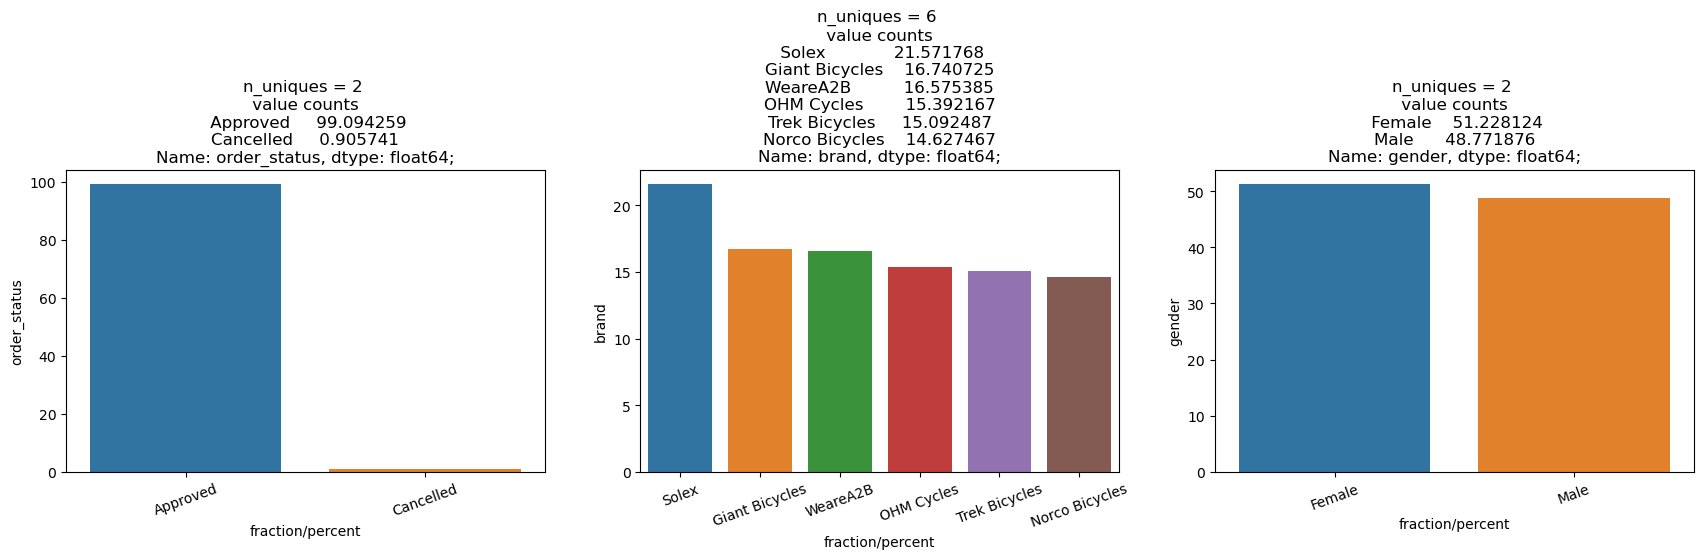

In [935]:
UVA_category(data, ['order_status','brand','gender'])

- Approved orders accounts about 99% & cancelled is 1% 
- Solex was the most purchased Brand, Narco bicycles were purchased the least. 
- We have more female customers than male 50%, 47% respectively. About 2% percent were unknown. 

#### Columns: Product line, Product Class, Product size. 

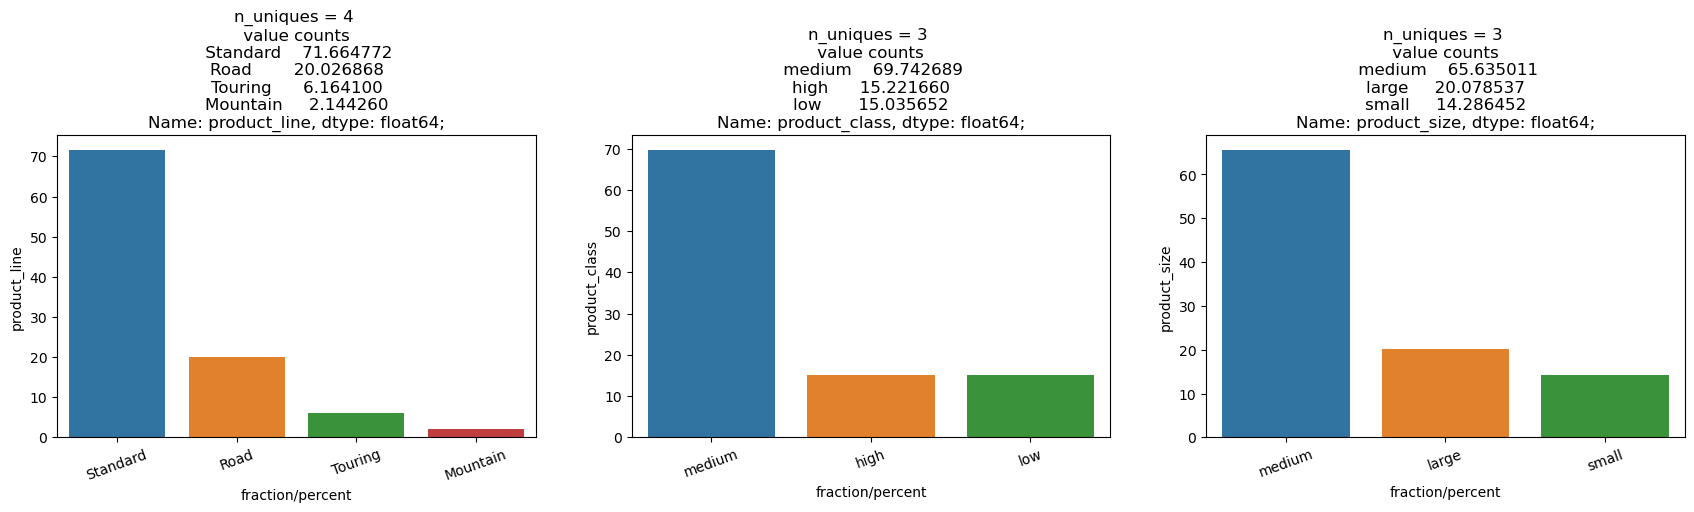

In [936]:
UVA_category(data,['product_line','product_class','product_size'])

- Product line belonging to standard were most purchased (71.5%), Mountain productline was least purchased. 
- Medium products class were purchased the most, almost 4 times that of high class and low class. 
- Medium size products is being bought the most, again almost 3 times that of large sized. The least is small size products. 

#### Columns:  Job industry category, Wealth Segment: 

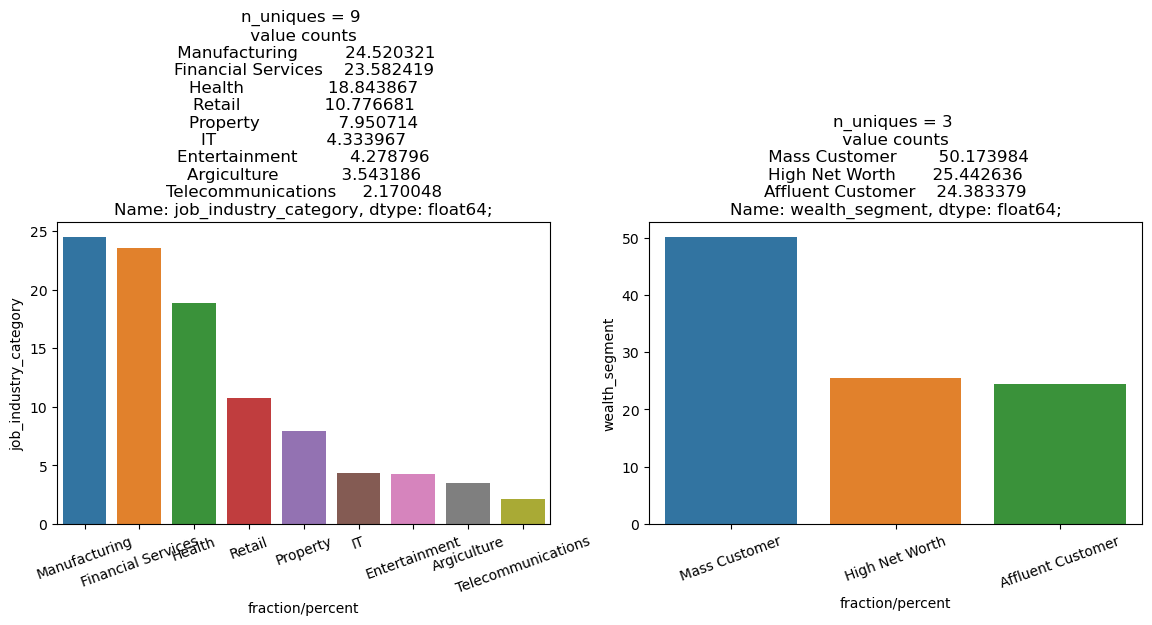

In [937]:
UVA_category(data, ['job_industry_category','wealth_segment'])

- Customers belonging to Manufacturing industry and Financial services had purchased most, customers belonging to Agriculture and Telecommunication are the lowest. 
- Based on wealth segment, Mass customers accounts half of the purchases and high net worth, affluent customers has 25% accounted of the purchase each 

#### Columns:- Deceased indicator, Owns car: 

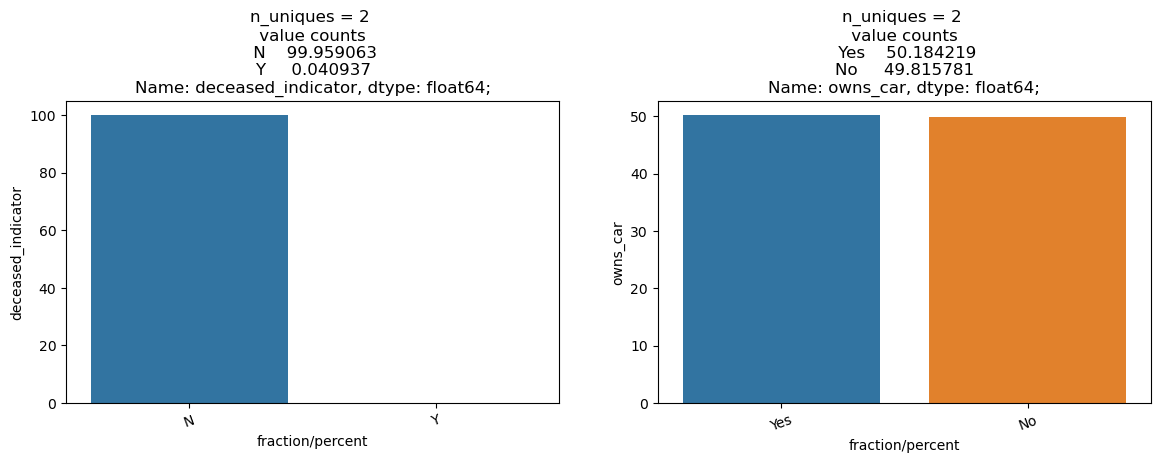

In [938]:
UVA_category(data, ['deceased_indicator', 'owns_car'])

- 99.9% customers are alive. 
- Half of the customers own a car. 

#### Columns: State

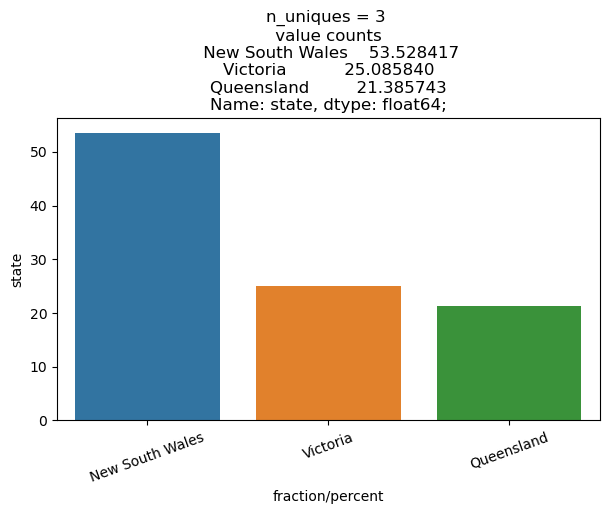

In [939]:
UVA_category(data,['state'])

- About 53% customers are from New South Wales. Customers from Queensland were the least compared to the other two states. 

#### Modifying the function to display the top 10 job titles since there are lots:

In [940]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 90)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True).nlargest(50) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))


Naming the missing values for job_title as 'Missing'. 

In [941]:
data['job_title'].fillna('Missing', inplace=True)
data['job_title'].value_counts() 

Missing                                 2355
Social Worker                            219
Business Systems Development Analyst     208
Legal Assistant                          205
Nuclear Power Engineer                   205
                                        ... 
Automation Specialist IV                  15
Health Coach III                          14
Geologist II                              11
Research Assistant III                     9
Developer I                                7
Name: job_title, Length: 196, dtype: int64

Creating a temporary dataframe with no missing values to visualize because a high number of values are missing:

In [942]:
job_title_temp = data[data['job_title'] != 'Missing']
job_title_temp.job_title.value_counts() 

Social Worker                           219
Business Systems Development Analyst    208
Legal Assistant                         205
Nuclear Power Engineer                  205
Internal Auditor                        203
                                       ... 
Automation Specialist IV                 15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: job_title, Length: 195, dtype: int64

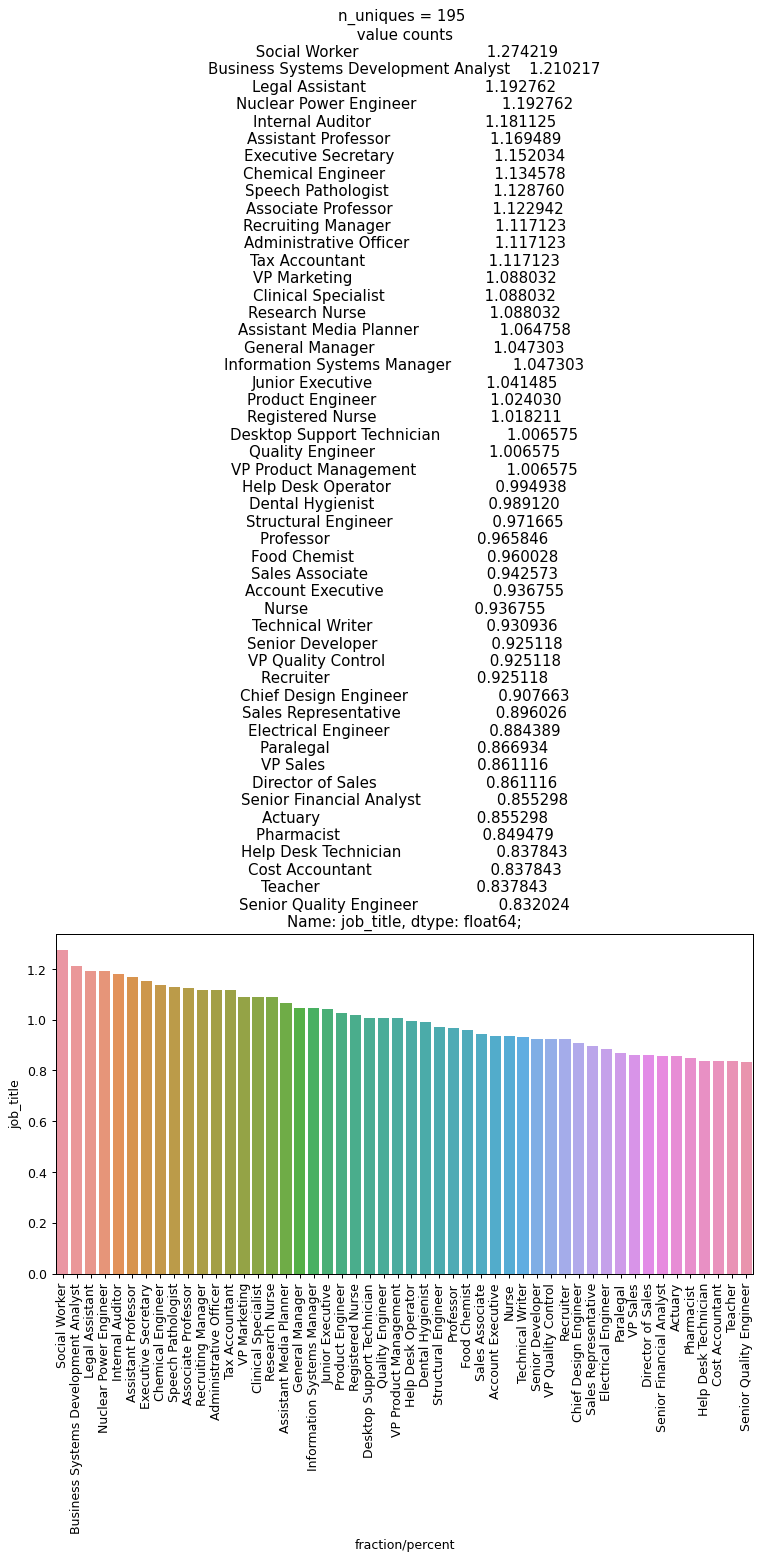

In [943]:
UVA_category(job_title_temp,['job_title'])

##### Function modified to see the lowest.

- Customers who are Social Workers, Business Systems Development Analyst, Legal Assistants are the top 3 based on the number of customers, they comprise about 1.27%, 1.21%, 1.19% of the data. 

In [944]:
def UVA_category_last(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 70)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True).nsmallest(20) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))


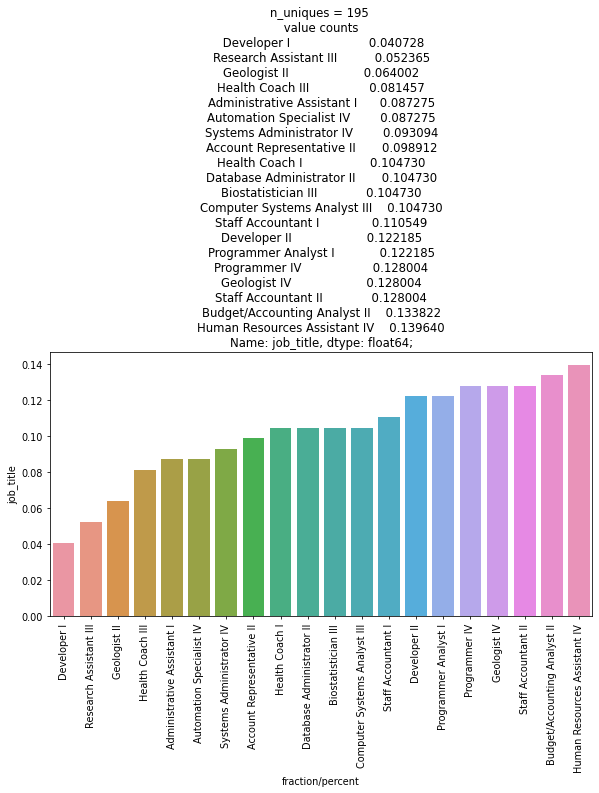

In [945]:
UVA_category_last(job_title_temp,['job_title'])

- Developer I, Research assistant III and geologist II are the bottom 3 based on the number of customers. 0.04%, 0.05%, 0.06% respective. 

#### Columns: Postcode:

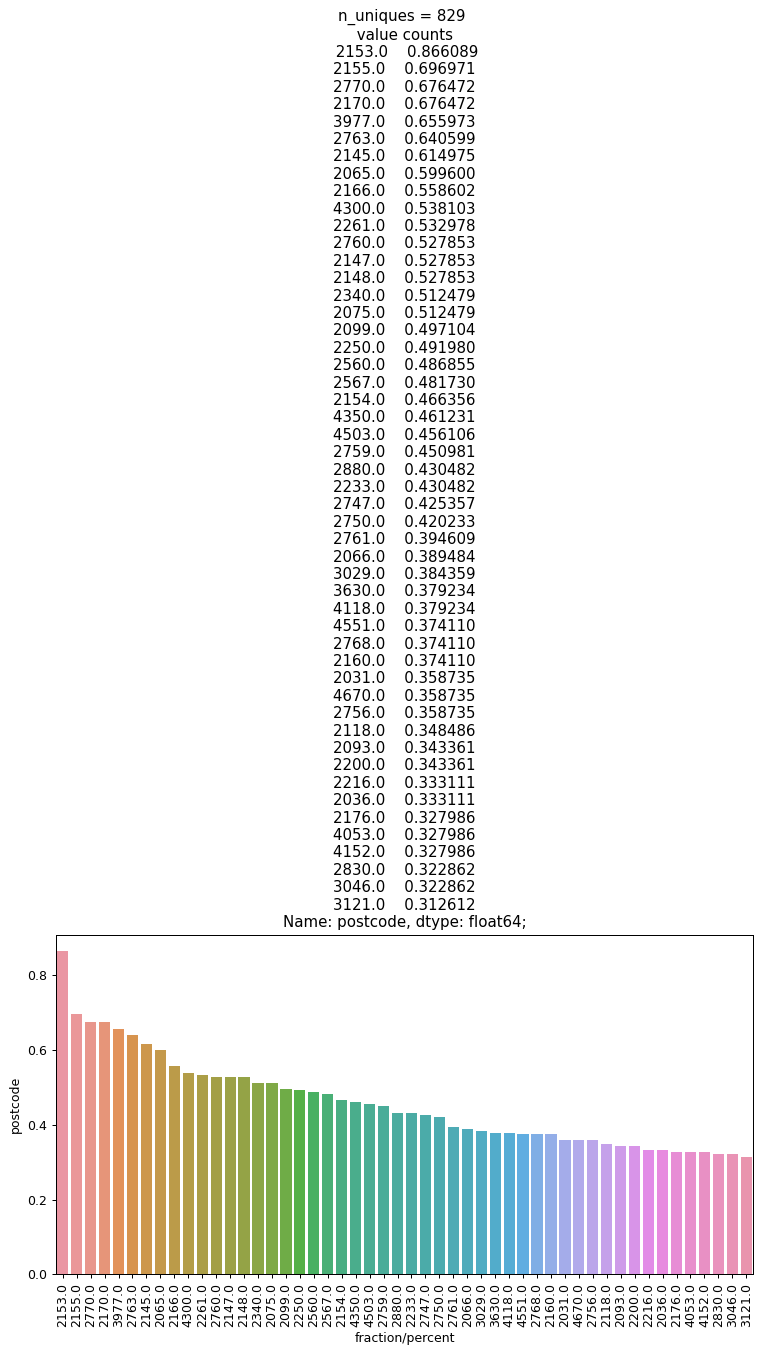

In [946]:
UVA_category(data,['postcode'])

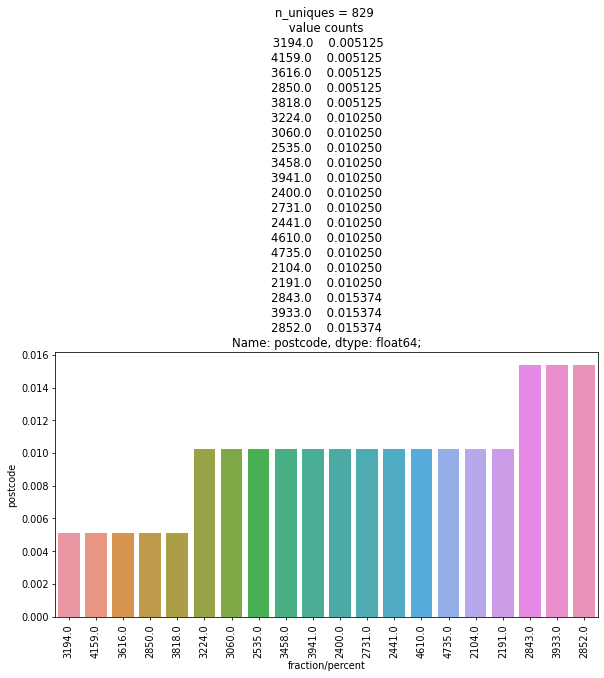

In [947]:
UVA_category_last(data,['postcode']) # least 

 Customers from 2153 are the highest and 3818, 3616, 3194, 4159, 2850 are the lowest. 


#### Columns: Month:

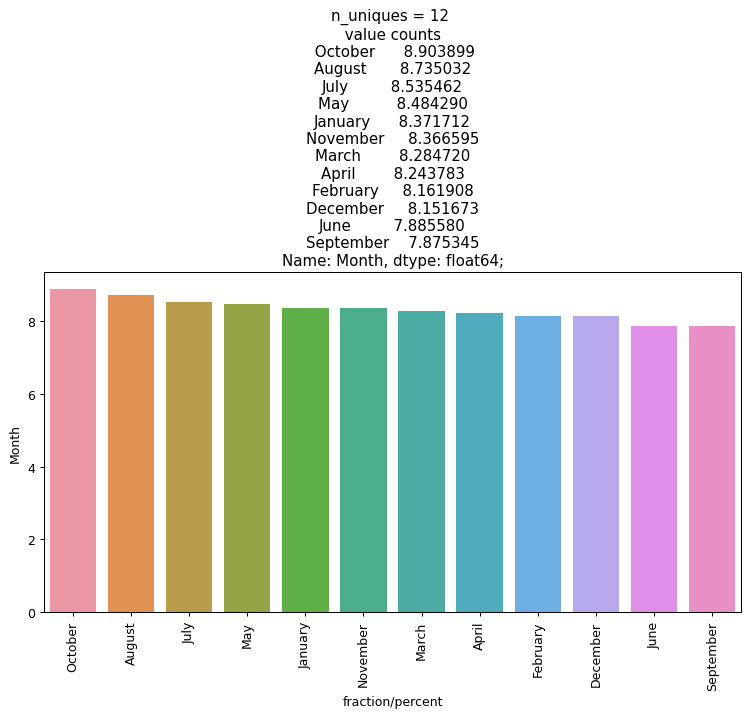

In [948]:
UVA_category(data, ['Month'])

- Month of october has high number of Purchashes about (8.9%) followed by august (8.7%). 
- Sep and jun has the lowest number of purchases, about 7.8% each. 

#### Columns: Online Order

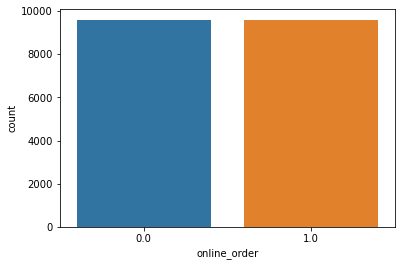

In [949]:
data['online_order'].value_counts()

data['online_order'] = data['online_order'].map({1.0:1,0.0:0})
sns.countplot(data['online_order'])

They're almost equal
***

### Initial Univariate Analysis of Numerical columns:

In [950]:
num = data.select_dtypes(include=  ['int64','float64'])
num.dtypes

online_order                           float64
list_price                             float64
standard_cost                          float64
profit                                 float64
past_3_years_bike_related_purchases    float64
tenure                                 float64
postcode                               float64
property_valuation                     float64
age                                    float64
dtype: object

##### We are creating a function to see the descriptive statistics of the variables from the dataset:

In [951]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    std = data[i].std()
     

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; std = {}; range = {}\nmean = {}; median = {})'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2), round(std),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

#### Columns: List Price, Standard Cost, Profit: 

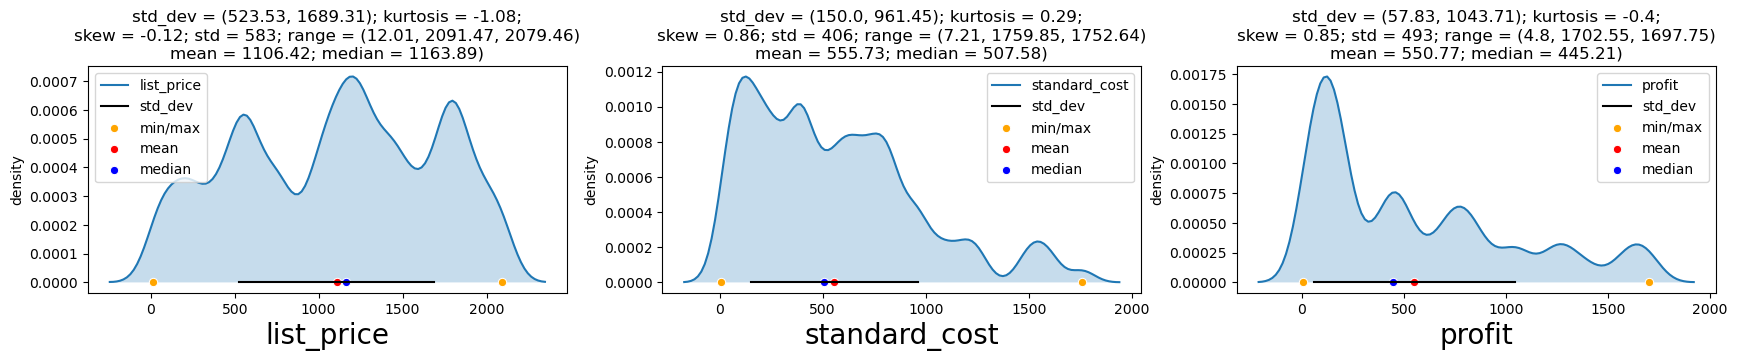

In [952]:
UVA_numeric(data, ['list_price','standard_cost','profit'])

- List price: 
    - Median is greater than mean which denoted there is some left skewedness, we can see that from the negative value. 
    - Range is from 12 to maximum value of 2091 AUSD. 
    - There are peaks in the distribution which denotes outliers in the data. 
    - Most list prices range from 525 to 1690 AUSD.  
    - Std is lesser than the mean, which tells its Clustered around the mean. 
    
- Standard_cost: 
    - Median is lesser than the mean which shows some positive/right skewedness. Positive skew value. 
    - The values range from 7 - max 1759 AUSD
    - there are peaks in the distribution which denotes outliers in the data. 
    - Most of the cost ranges from 150 to 962 AUSD
    - Std deviation is lesser than the mean, which shows that the values are somewhat clustered around the mean.
    - Standard cost is biased towards lower standard cost. 
    
- Profit: 
    - Mean is greater than the median which tells its right skewed. 
    - Values ranges from 4.8 to 1702 AUSD. Most of the profits range from 58 to 1045 AUSD
    - There are several peaks in the dist. 
    - std dev is less than the mean which tells its clustered around the mean. 
    - Generally there is not much profit.Its biased towards lesser profit. 


#### Number of bike related Purchases last three years, Tenure, Property Valuation: 

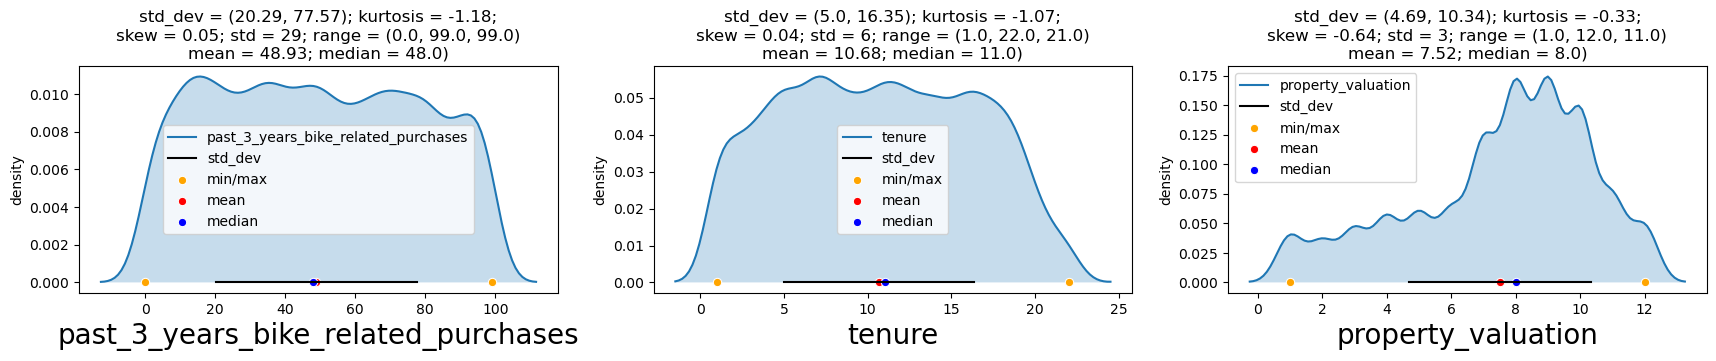

In [953]:
UVA_numeric(data, ['past_3_years_bike_related_purchases','tenure','property_valuation'])

- Past_3_years_bike_related_purchases: 
    - Median is amlost same as the mean. The distribution is symmetric. There is no skewedness its close to zero. 
    - Range is from 0 to maximum value of 99. 
    - There are slight peaks in the distribution which denotes little outliers in the data. 
    - Number of bike related purchases past 3 years mostly ranges from 20 to 77 times.  
    - Median is close to the mean, hence its some what symmetrical. 
    - Std is lesser than the mean, which tells its Clustered around the mean. 
    - Kurtosis value is negative, its not normally distribution. 
    
    
- tenure: 
    - There is not skewedness in the data, although there is a negative kurtosis. Itsnot normal distribution. Outlliers present.
    - The values range from 1 year - 22 years. 
    - there are  lsight peaks in the distribution which little extreme values in the data. 
    - The tenure mostly varies between 5 years and 16 years. 
    - Median is close to the mean, hence its symmetrical. 
    - Std deviation is slightly lesser than the mean, which shows that the values are somewhat clustered around the mean.
    
    
- property_valuation: 
    - Median is lesser than the median which tells its left skewed. 
    - Values ranges from 4.8 to 1702. Most of the profits range from 58 to 1045
    - There are several peaks in the dist. 
    - std dev is less than the mean which tells its clustered around the mean. 
    - property valuation is biased towards higher values. 


#### COlumn: Age

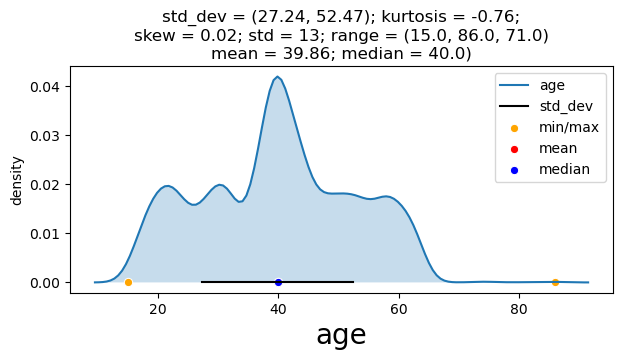

In [954]:
UVA_numeric(data,['age'])

- Majority of the customers are  27 to 52 years old, mean of age is 40years. 
- There is a negative Kurtosis value which indicated outliers. 
- std is lesser than mean, most data is clustered around the mean. 
- Mean is same as median which shows its symmetrical. 


##### Lets see after removing the outliers: 

(array([2330., 2255., 2401., 5435., 2693., 2322., 2076.,    0.,   15.,
          15.]),
 array([15. , 22.1, 29.2, 36.3, 43.4, 50.5, 57.6, 64.7, 71.8, 78.9, 86. ]),
 <a list of 10 Patch objects>)

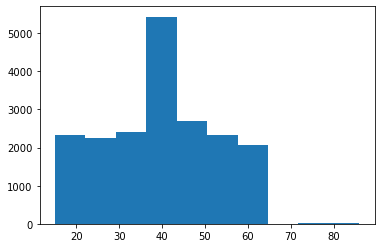

In [955]:
plt.hist(data['age'])

#### Creating a Age bin for the age: 

In [956]:
def age_cat(col): 
    if col < 10: 
        return '0_10'
    elif (col >=10 and col < 20):
        return '10_20'
    elif (col >=20 and col < 30): 
        return '20_30'
    elif (col >=30 and col <40): 
        return '30_40'
    elif (col >= 40 and col < 50): 
        return '40_50'
    elif (col >=50 and col < 60): 
        return '50_60'
    elif (col >=60 and col < 70): 
        return '60_70'
    elif (col >= 70 and col < 80): 
        return '70_80'
    elif col > 80:
        return '>80'
    

In [957]:
data['age_cat'] = data['age'].apply(age_cat)

In [958]:
data.head() 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,age,Month,age_cat
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Yes,10.0,984 Hoepker Court,3064.0,Victoria,Australia,6.0,62.0,February,60_70
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Yes,10.0,4 Shopko Circle,2196.0,New South Wales,Australia,5.0,38.0,May,30_40
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,No,22.0,586 Miller Parkway,2835.0,New South Wales,Australia,1.0,40.0,October,40_50
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,No,16.0,1617 Harper Parkway,2096.0,New South Wales,Australia,10.0,56.0,August,50_60
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Yes,2.0,0601 Stephen Place,2292.0,New South Wales,Australia,7.0,21.0,October,20_30


In [959]:
data['age_cat'].value_counts()

40_50    5429
30_40    4716
20_30    3504
50_60    3490
60_70    1292
10_20    1081
>80        15
70_80      15
Name: age_cat, dtype: int64

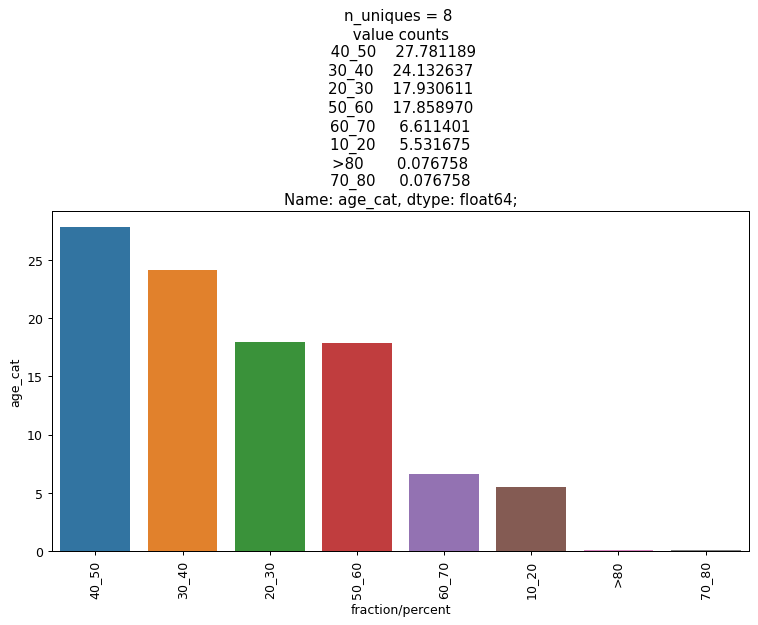

In [960]:
UVA_category(data,['age_cat']) # least

Majority of the customers are aged between 30 and 50. 

### Bivariate analysis: 

#### Correlation matrix between numerical values: 

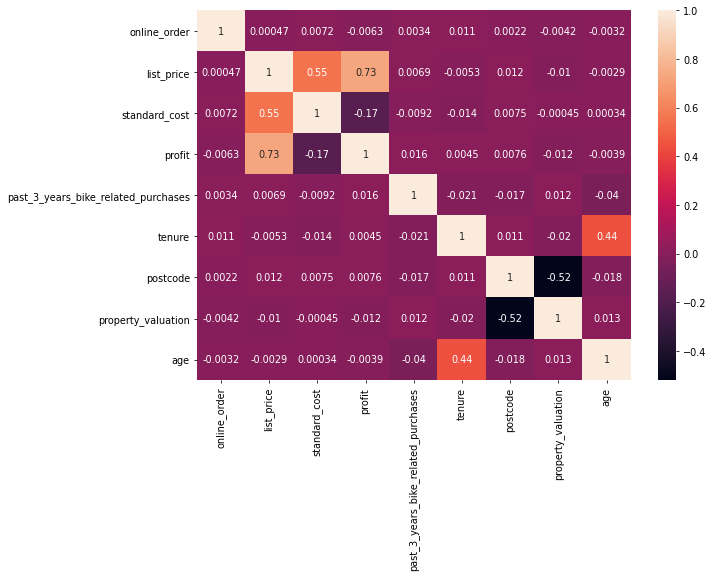

In [961]:
plt.figure(dpi = 70, figsize = (10,7) )
sns.heatmap(data.corr(), annot = True)

In [962]:
num.dtypes

online_order                           float64
list_price                             float64
standard_cost                          float64
profit                                 float64
past_3_years_bike_related_purchases    float64
tenure                                 float64
postcode                               float64
property_valuation                     float64
age                                    float64
dtype: object

#### Profit vs List_Price and Standard cost vs List Price: 

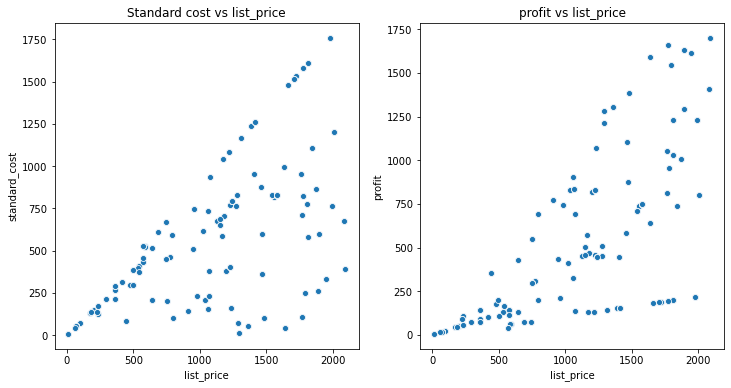

In [963]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.scatterplot(data['list_price'], data['standard_cost'],ax=ax[0])
sns.scatterplot(data['list_price'], data['profit'],ax = ax[1])
ax[0].set_title("Standard cost vs list_price")
ax[1].set_title("profit vs list_price")
plt.show()

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# sns.countplot(customer_new['age_cat'], ax = ax[0])
# sns.countplot(data['age_cat'], ax = ax[1])
# ax[0].set_title("New customer list")
# ax[1].set_title("Old dataaset")


- There is an almost linear relationship between List price and standard cost. There are some outliers that has high list price but low standard cost, But there are no high standard cost and low list price. 
- Profit vs list_price: Again there is a slight linearity between them. Higher the list Price higher the profit. Although some outliers exists 

#### Standard cost vs Profit; Age vs Tenure:

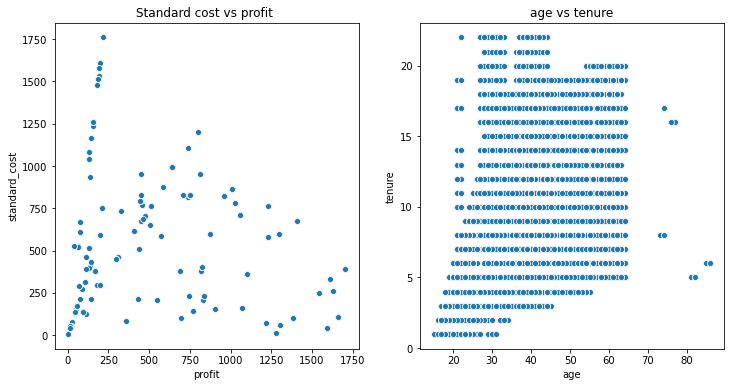

In [964]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.scatterplot(data['profit'], data['standard_cost'],ax=ax[0])
sns.scatterplot(data['age'], data['tenure'],ax = ax[1])
ax[0].set_title("Standard cost vs profit ")
ax[1].set_title("age vs tenure")
plt.show()

- Theres very linearity between the Standard cost and the Profit. Can say there are plenty of outliers. 
- Age vs Tenure: Higher the age, Longer the tenure. Some outliers exists, Even though theyre 20 years old, the tenure is 20 years. There is a very small pattern but not significant

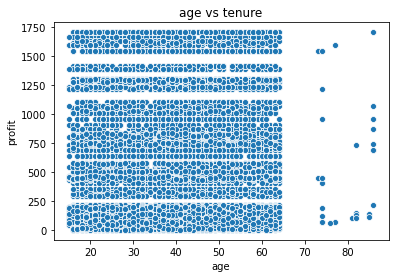

In [965]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# sns.scatterplot(data['profit'], data['standard_cost'],ax=ax[0])
sns.scatterplot(data['age'], data['profit'])
# ax[0].set_title("Standard cost vs profit ")
plt.title("age vs profit")
plt.show()

#### There is no relationship between the two. 

### Initial Bivariate Analysis -- Cont- Cat:

Target Variable is Profit, since we are going to perform RFM Analysis based on it. 

In [966]:
cat.dtypes

transaction_id           object
product_id               object
customer_id              object
order_status             object
brand                    object
product_line             object
product_class            object
product_size             object
first_name               object
last_name                object
gender                   object
job_title                object
job_industry_category    object
wealth_segment           object
deceased_indicator       object
default                  object
owns_car                 object
address                  object
state                    object
country                  object
Month                    object
dtype: object

#### Product line vs profit:

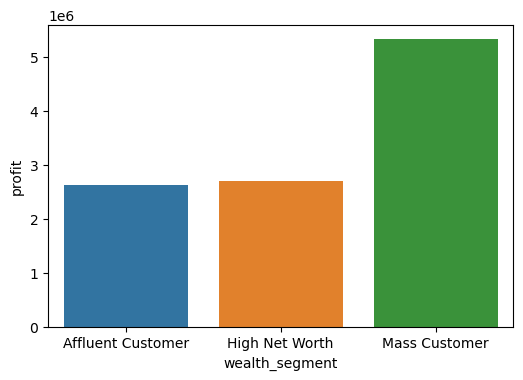

In [967]:
product_line = pd.DataFrame(data.groupby('wealth_segment')['profit'].sum())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(6,4), dpi = 100)
sns.barplot(x='wealth_segment',y = 'profit', data = product_line, );

- Mass customers generate more profitable. 

#### Product line vs profit.

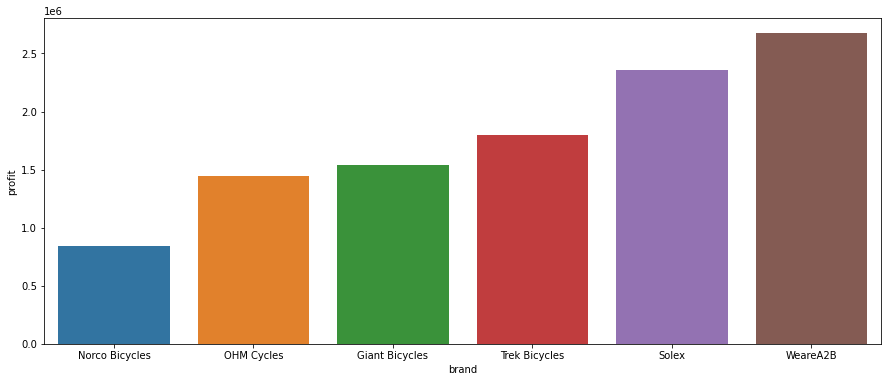

In [968]:
product_line = pd.DataFrame(data.groupby('brand')['profit'].sum())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(15,6))
sns.barplot(x='brand',y = 'profit', data = product_line, );

- WeareA2B bring high profit margins, norco bicycles bring the least. 

#### Product line vs profit. 

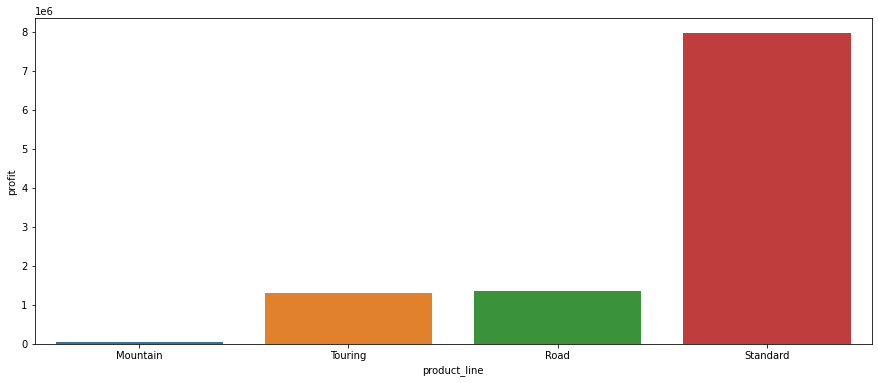

In [969]:
product_line = pd.DataFrame(data.groupby('product_line')['profit'].sum())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(15,6))
sns.barplot(x='product_line',y = 'profit', data = product_line, );

In [970]:
product_line

,product_line,profit
0,Mountain,40055.85
3,Touring,1300603.11
1,Road,1363863.15
2,Standard,7955071.15


- Standard products is the highest profitable. 
- Mountain product line is the least. 

#### job_industry vs profit


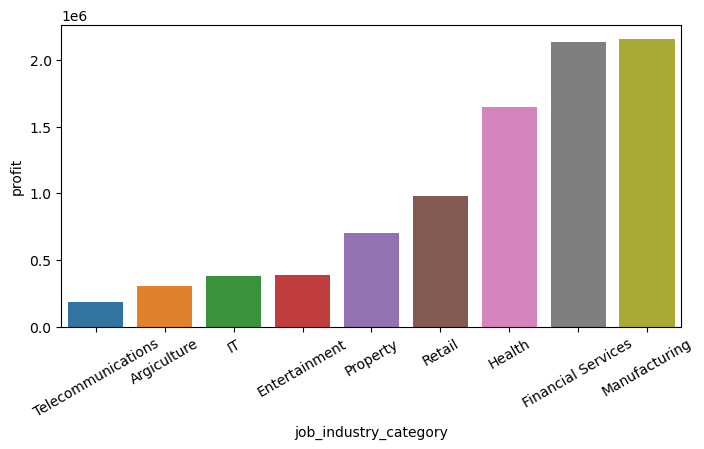

In [971]:
job_industry = pd.DataFrame(data.groupby('job_industry_category')['profit'].sum())
job_industry.reset_index(inplace = True) 
job_industry.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(8,4), dpi = 100)
sns.barplot(x='job_industry_category',y = 'profit', data = job_industry, )
plt.xticks(rotation = 30);

financial services, Retail, Entertainment bring more profit. Although every other industries are almost same. 

- customers working in Manufacturing and financial service industry generate more profit. 
- customers working in Telecommunication is least profitable

#### Job title vs profit


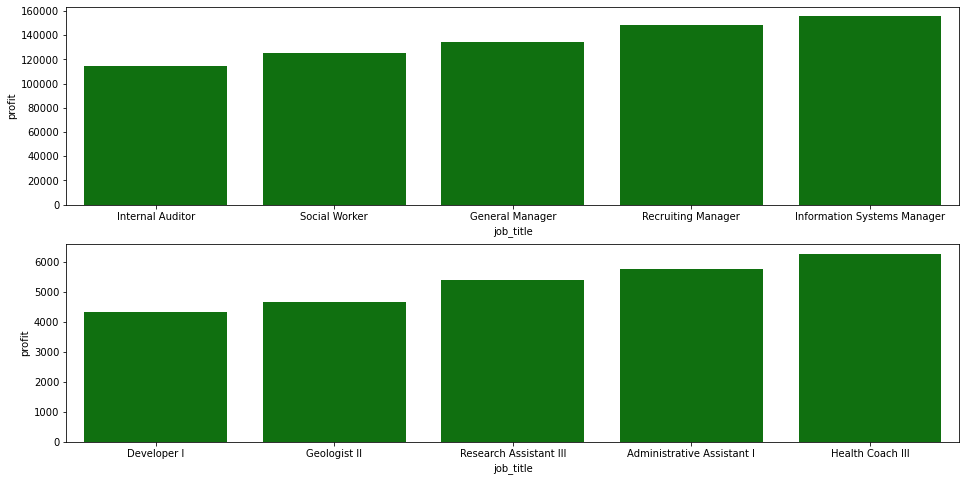

<Figure size 600x400 with 0 Axes>

In [972]:
title = pd.DataFrame(data.groupby('job_title')['profit'].sum())
title.reset_index(inplace = True) 
title.sort_values(inplace = True, by = 'profit')
title = title[title.job_title!='Missing']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
plt.figure(figsize=(6,4), dpi = 100);
sns.barplot(x='job_title',y = 'profit', data = title.tail(5),color = 'green', ax = ax[0]);
sns.barplot(x='job_title',y = 'profit', data = title.head(5),color = 'green', ax = ax[1]);

- Most profits are generated from customers who work as information system manager, recruiting manager, General Manager
- Least profits are generated from people who work as Dev 1, geologist 2. 

#### Profits vs Owning a car

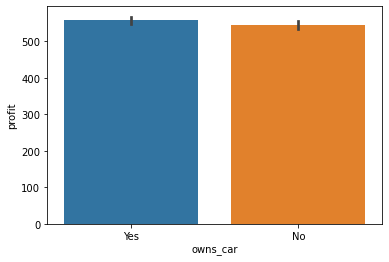

In [973]:
sns.barplot(x='owns_car',y='profit',data = data)

They're almost same. No siginicant evidence owning a car means these customers are profitable. 

#### Postcode vs profit. 

In [974]:
post = pd.DataFrame(data.groupby('postcode')['profit'].sum())
post.reset_index(inplace = True) 
post['postcode'] = post['postcode'].astype('int64')
post['postcode'] = post['postcode'].astype('object')
post.sort_values(inplace = True, by = 'profit')
post

,postcode,profit
418,3060,41.13
580,3616,41.13
136,2191,119.73
279,2535,204.36
567,3458,327.23
...,...,...
346,2770,70968.61
43,2065,73790.71
340,2763,77423.12
128,2170,79037.80


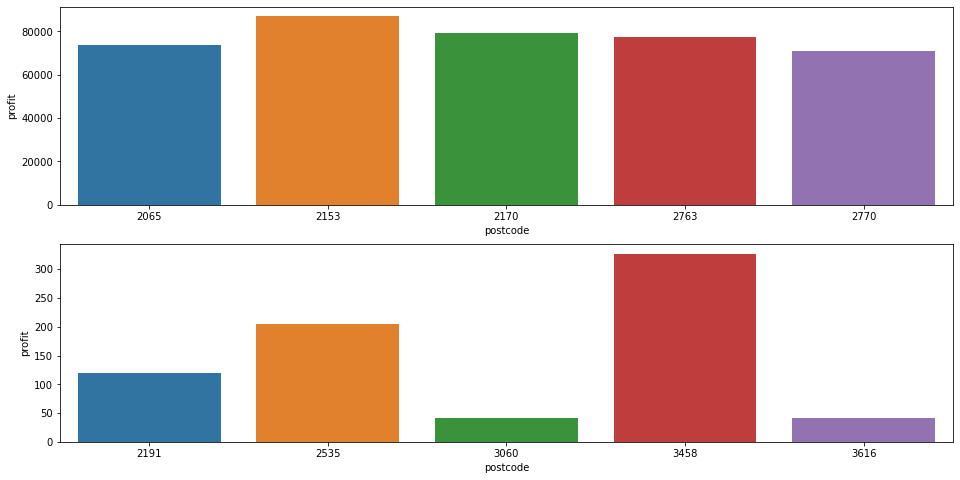

<Figure size 300x200 with 0 Axes>

In [975]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
plt.figure(figsize=(6,4), dpi = 50)
sns.barplot(x='postcode',y = 'profit', data = post.tail(), ax = ax[0]);
sns.barplot(x='postcode',y = 'profit', data = post.head(), ax = ax[1] );

- Customers belonging to 2153 yeild most profit. where as customers from 3060 is least profitable.

#### Age_bin vs profit


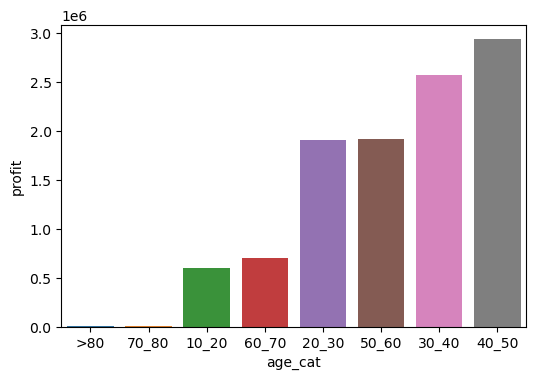

In [976]:
age_bin = pd.DataFrame(data.groupby('age_cat')['profit'].sum())
age_bin.reset_index(inplace = True) 
age_bin.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(6,4), dpi = 100)
sns.barplot(x='age_cat',y = 'profit', data = age_bin, );

- Customers between 30 - 50 years old produce most profit. 
- customers greater than 80, 10 -20 and 60 -70 are least profitable. 

---

# RFM

### Lets create some variables for further analysis: 
    

In [977]:
data['recency'] = data['transaction_date'].max() - data['transaction_date']
data['recency'] = data['recency']/np.timedelta64(1,'D')
data['recency'] = data['recency'].astype('int')

In [978]:
data.shape, data['customer_id'].nunique()

((19542, 35), 3416)

Only 3416 records are unique from the above dataset. Thats because same customer_id has made multiple purchases

In [979]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,address,postcode,state,country,property_valuation,age,Month,age_cat,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,984 Hoepker Court,3064.0,Victoria,Australia,6.0,62.0,February,60_70,308
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,4 Shopko Circle,2196.0,New South Wales,Australia,5.0,38.0,May,30_40,223
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,22.0,586 Miller Parkway,2835.0,New South Wales,Australia,1.0,40.0,October,40_50,75
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,1617 Harper Parkway,2096.0,New South Wales,Australia,10.0,56.0,August,50_60,121
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,2.0,0601 Stephen Place,2292.0,New South Wales,Australia,7.0,21.0,October,20_30,90


### RFM Score Calculations

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent

We have performed RFM analysis from our main dataset for each customer_id based on the profits generated from them. 
RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.


- The columns on the RFM pivot table are min recency which denotes the number of days from the most recent date in the dataset. WE have taken the Minimum value of the recency since we need the most recent data. 
- Count product_id, Number of products per customer, Sum profit denotes the Total profits generated from a particular customer. 
- Recency_score is the score based on how recent was the purchase made. 
    - If the purchase was made more than 88 days ago it was given 1, 
    - between 45 days & 88 days - 2; 
    - between 45 days & 18 days - 3; 
    - less than 18 days - 4. Higher value for most recent. 
- F_score: Frequency score, based on how many times they visited. Higher the score, higher the number of transaction by that customer.
    - If the number of transactions(products) were greater than 7 transactions - score will be 4; 
    - if number of transactions between 6 & 7  - 3; 
    - if number of transactions between 6 & 4 - 2, 
    - less than or equal to 4 transactions  - 1.  
- M_score: Monetary score based on the total profit from the customer. 
    - If the sum of the profits were above 4183 AUSD - score 4; 
    - If the sum of the profits were between 2861 & 4183 AUSD - score 3; 
    - If the sum of the profits were between 2861 & 1841 AUSD - score 2; 
    - If the sum of the profits were less  than 1841 AUSD - score 1 ; 


In [1008]:
pivot = pd.pivot_table(data, index = 'customer_id',values = ['recency', 'profit','product_id'], aggfunc = ['min','count','sum'] )
#pd.pivot_table(data=df_flights, index='month', values='passengers', aggfunc='sum').reset_index().rename(columns={'passengers': 'total_passengers'})


In [1009]:
pivot

min                      count                     sum  \
            product_id  profit recency product_id profit recency   profit   
customer_id                                                                 
1                   11   17.87       7         11     11      11  3018.09   
10                   0  114.93      33          6      5       6  3358.28   
100                 51   75.14      11          2      2       2   877.40   
1000                 1  133.38       0          9      9       9  5383.48   
1001                18   14.23      42          7      7       7  2884.19   
...                ...     ...     ...        ...    ...     ...      ...   
994                 10   17.87      42          5      5       5  2069.64   
995                  3  199.10      11          7      7       7  6764.67   
997                 22   15.08      59          7      7       7  2923.29   
998                 11   75.48     321          2      2       2   585.45   
999                  0  152.55      54         10     10      10  8611.95   

                     
            recency  
customer_id          
1              2204  
10              708  
100             245  
1000           1575  
1001           1614  
...             ...  
994             907  
995            1337  
997            1087  
998             677  
999            1763  

[3416 rows x 8 columns]

In [982]:
list(pivot.columns)

[('min', 'product_id'),
 ('min', 'profit'),
 ('min', 'recency'),
 ('count', 'product_id'),
 ('count', 'profit'),
 ('count', 'recency'),
 ('sum', 'profit'),
 ('sum', 'recency')]

#### Filtering the needed Columns: 

In [1011]:
pivot = pivot[[('min', 'recency'),('count', 'product_id'),('sum', 'profit') ]].reset_index() 

In [1012]:
pivot.head() 

,customer_id,min,count,sum
,,recency,product_id,profit
0,1,7,11,3018.09
1,10,33,6,3358.28
2,100,11,2,877.40
3,1000,0,9,5383.48
4,1001,42,7,2884.19


In [1013]:
pivot.describe() 

,min,count,sum
,recency,product_id,profit
count,3416.000000,3416.000000,3416.000000
mean,61.094555,5.720726,3120.489830
std,57.931015,2.323826,1770.197523
min,0.000000,1.000000,15.080000
25%,18.000000,4.000000,1834.892500
50%,44.000000,6.000000,2848.865000
75%,85.000000,7.000000,4170.790000
max,353.000000,14.000000,11668.950000


#### Using Quantile ranges we are going to assign values for F_score, R_score, M_score: 

In [1014]:
def rscore(col): 
    if col > 85: 
        return 1
    elif (col <= 85 and col > 44): 
        return 2 
    elif (col <= 44 and col > 17): 
        return 3
    elif col <= 17: 
        return 4

In [1015]:
def fscore(col): 
    if col > 7: 
        return 4
    elif (col <= 7 and col > 6): 
        return 3 
    elif (col <= 6 and col > 4): 
        return 2
    elif col <= 4: 
        return 1

In [1016]:
def mscore(col): 
    if col > 4183.107500: 
        return 4
    elif (col <= 4183.107500 and col > 2861.980000): 
        return 3 
    elif (col <= 2861.980000 and col > 1841.370000): 
        return 2
    elif col <= 1841.370000 : 
        return 1

In [1017]:
pivot[(' ', 'Recency_score')] = pivot[('min', 'recency')].apply(rscore)

In [1018]:
pivot[(' ', 'F_score')] = pivot[('count', 'product_id')].apply(fscore)

In [1019]:
pivot[(' ', 'M_score')] = pivot[('sum', 'profit')].apply(mscore)

In [1020]:
pivot.head(100)

customer_id     min      count      sum                              
               recency product_id   profit Recency_score F_score M_score
0            1       7         11  3018.09             4       4       3
1           10      33          6  3358.28             3       2       3
2          100      11          2   877.40             4       1       1
3         1000       0          9  5383.48             4       4       4
4         1001      42          7  2884.19             3       3       3
..         ...     ...        ...      ...           ...     ...     ...
95        1087      14          3  1521.57             4       1       1
96        1088      13          6  3595.32             4       2       3
97        1089     151          7  2349.29             1       3       2
98         109       8         10  4430.66             4       4       4
99        1090      71          7  1529.01             2       3       1

[100 rows x 7 columns]

#### Creating RFM Value: 

In [1021]:
pivot[(' ', 'RFM')] = 100*pivot[(' ','Recency_score')] + 10*pivot[(' ','F_score')] + pivot[(' ','M_score')]

In [1022]:
pivot.head() 

customer_id     min      count      sum                                   
              recency product_id   profit Recency_score F_score M_score  RFM
0           1       7         11  3018.09             4       4       3  443
1          10      33          6  3358.28             3       2       3  323
2         100      11          2   877.40             4       1       1  411
3        1000       0          9  5383.48             4       4       4  444
4        1001      42          7  2884.19             3       3       3  333

In [1023]:
pivot[(' ', 'RFM')].describe()

count    3416.000000
mean      275.496780
std       115.468191
min       111.000000
25%       211.000000
50%       311.000000
75%       344.000000
max       444.000000
Name: ( , RFM), dtype: float64

#### Giving Customer title based on the quantiles of RFM

In [1024]:
def customer(col): 
    if col > 411: 
        return 'Platinum'
    elif col <= 411 and col > 311:
        return 'Gold'
    elif col <= 311 and col > 211: 
        return 'Silver'
    elif col <= 211:
        return 'Bronze'

In [1025]:
pivot[(' ', 'Customer_title')] = pivot[(' ', 'RFM')].apply(customer)

In [1026]:
pivot.head() 

customer_id     min      count      sum                                     \
              recency product_id   profit Recency_score F_score M_score  RFM   
0           1       7         11  3018.09             4       4       3  443   
1          10      33          6  3358.28             3       2       3  323   
2         100      11          2   877.40             4       1       1  411   
3        1000       0          9  5383.48             4       4       4  444   
4        1001      42          7  2884.19             3       3       3  333   

                  
  Customer_title  
0       Platinum  
1           Gold  
2           Gold  
3       Platinum  
4           Gold

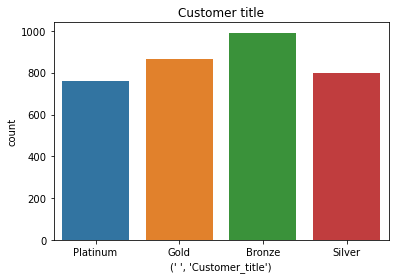

In [1027]:
# Customer title: 
sns.countplot(pivot[(' ', 'Customer_title')])
plt.title('Customer title')
plt.show() 

- We have high number of Bronze customers, followed by gold. 

#### Let merge the RFM Dataset with the Merged dataset based on the customer_id

In [1000]:
pivot.sample(2)

customer_id     min      count      sum                                \
                 recency product_id   profit Recency_score F_score M_score   
2470        3271      90          5  1938.79             1       2       2   
1381        2268      35          8  4473.32             3       4       4   

                          
      RFM Customer_title  
2470  122         Bronze  
1381  344           Gold

In [1029]:
pivot.columns[0]

('customer_id', '')

In [1032]:
pivot['customer_id'] = pivot[('customer_id', '')]
pivot.columns[0] 
#df['count_product'] = df[('count', 'product_id')]


('customer_id', '')

In [1034]:
pivot.head()

customer_id     min      count      sum                                     \
              recency product_id   profit Recency_score F_score M_score  RFM   
0           1       7         11  3018.09             4       4       3  443   
1          10      33          6  3358.28             3       2       3  323   
2         100      11          2   877.40             4       1       1  411   
3        1000       0          9  5383.48             4       4       4  444   
4        1001      42          7  2884.19             3       3       3  333   

                  
  Customer_title  
0       Platinum  
1           Gold  
2           Gold  
3       Platinum  
4           Gold

In [ ]:
sns.

In [1036]:
piv2 = pivot.merge(data, on = 'customer_id', how = 'right')
piv2 = piv2.drop_duplicates(subset = 'customer_id',keep='first')

In [1038]:
piv2.sample(2)

,customer_id,"(customer_id, )","(min, recency)","(count, product_id)","(sum, profit)","( , Recency_score)","( , F_score)","( , M_score)","( , RFM)","( , Customer_title)",...,tenure,address,postcode,state,country,property_valuation,age,Month,age_cat,recency
796,1126,1126,19,4,2135.37,3,1,2,312,Gold,...,14.0,48 Sheridan Road,3185.0,Victoria,Australia,11.0,43.0,March,40_50,301
5276,1850,1850,44,7,5159.72,3,3,4,334,Gold,...,7.0,95294 Karstens Park,2155.0,New South Wales,Australia,9.0,39.0,October,30_40,90


In [1039]:
piv2.drop(['default'], axis =1, inplace = True)

In [1040]:
print(piv2.columns)

Index([                        'customer_id',
                         ('customer_id', ''),
                          ('min', 'recency'),
                     ('count', 'product_id'),
                           ('sum', 'profit'),
                      (' ', 'Recency_score'),
                            (' ', 'F_score'),
                            (' ', 'M_score'),
                                (' ', 'RFM'),
                     (' ', 'Customer_title'),
                            'transaction_id',
                                'product_id',
                          'transaction_date',
                              'online_order',
                              'order_status',
                                     'brand',
                              'product_line',
                             'product_class',
                              'product_size',
                                'list_price',
                             'standard_cost',
                   'product_first_

#### Percentage of missing values:

In [1042]:
df = piv2.copy() 
(df.isnull().sum()/len(df)).sort_values(ascending = False) * 100

job_industry_category                  16.422717
last_name                               3.190867
online_order                            1.551522
product_first_sold_date                 0.731850
product_line                            0.731850
product_class                           0.731850
product_size                            0.731850
standard_cost                           0.731850
profit                                  0.731850
brand                                   0.731850
postcode                                0.117096
property_valuation                      0.117096
country                                 0.117096
state                                   0.117096
address                                 0.117096
(sum, profit)                           0.000000
(customer_id, )                         0.000000
(min, recency)                          0.000000
transaction_date                        0.000000
product_id                              0.000000
( , Recency_score)  

#### Renaming the columns:

In [1043]:
df['count_product'] = df[('count', 'product_id')]
df['min_recency'] = df[('min', 'recency')]
df['sum_profit'] = df[('sum', 'profit')]
df['recency_score'] = df[(' ', 'Recency_score')]
df['F_score'] = df[(' ', 'F_score')]
df['M_score'] = df[(' ', 'M_score')]
df['RFM'] = df[(' ', 'RFM')]
df['Customer_title'] = df[(' ', 'Customer_title')]

In [1044]:
df.columns[0:]

Index([                        'customer_id',
                         ('customer_id', ''),
                          ('min', 'recency'),
                     ('count', 'product_id'),
                           ('sum', 'profit'),
                      (' ', 'Recency_score'),
                            (' ', 'F_score'),
                            (' ', 'M_score'),
                                (' ', 'RFM'),
                     (' ', 'Customer_title'),
                            'transaction_id',
                                'product_id',
                          'transaction_date',
                              'online_order',
                              'order_status',
                                     'brand',
                              'product_line',
                             'product_class',
                              'product_size',
                                'list_price',
                             'standard_cost',
                   'product_first_

In [1045]:
# Removing the unwanted columns: 
final = df.drop(columns = df.columns[1:10], axis = 1)
final.head() 

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age_cat,recency,count_product,min_recency,sum_profit,recency_score,F_score,M_score,RFM,Customer_title
0,1,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,60_70,7,11,7,3018.09,4,4,3,443,Platinum
11,10,4565,5,2017-08-26,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,20_30,126,6,33,3358.28,3,2,3,323,Gold
17,100,5925,51,2017-05-10,1.0,Approved,OHM Cycles,Standard,high,medium,...,40_50,234,2,11,877.40,4,1,1,411,Gold
19,1000,967,45,2017-06-26,1.0,Approved,Solex,Standard,medium,medium,...,30_40,187,9,0,5383.48,4,4,4,444,Platinum
28,1001,474,18,2017-10-07,1.0,Approved,Solex,Standard,medium,medium,...,30_40,84,7,42,2884.19,3,3,3,333,Gold


In [1046]:
final.shape
# No duplicated also had same value. 

(3416, 42)

#### Creating Customer Value title:

In [1047]:
final['RFM'].describe() 

count    3416.000000
mean      275.496780
std       115.468191
min       111.000000
25%       211.000000
50%       311.000000
75%       344.000000
max       444.000000
Name: RFM, dtype: float64

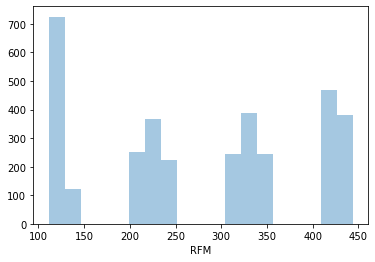

In [1048]:
sns.distplot(final['RFM'],kde=False)

In [1049]:
def rank_cat(col): 
    if (col == 444): 
        return 'platinum customer'
    elif (col < 444 and col >= 433): 
        return 'very loyal' 
    elif (col < 433 and col >= 421): 
        return 'becoming loyal'
    elif (col < 421 and col >= 344): 
        return 'recent customer' 
    elif (col < 344 and col >= 323): 
        return 'poten cust'
    elif (col < 323 and col >= 311): 
        return 'late bloomer' 
    elif (col < 311 and col >= 224): 
        return 'losing customer'
    elif (col < 224 and col >= 212): 
        return 'high risk customer' 
    elif (col < 212 and col >= 124): 
        return 'almost lost customer'
    elif (col < 124 and col >= 112): 
        return 'evasive cust' 
    elif (col == 111):
        return 'lost cust'

In [1050]:
final['Customer_value'] = final['RFM'].apply(rank_cat)

In [1051]:
final.head() 

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,count_product,min_recency,sum_profit,recency_score,F_score,M_score,RFM,Customer_title,Customer_value
0,1,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,7,11,7,3018.09,4,4,3,443,Platinum,very loyal
11,10,4565,5,2017-08-26,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,126,6,33,3358.28,3,2,3,323,Gold,poten cust
17,100,5925,51,2017-05-10,1.0,Approved,OHM Cycles,Standard,high,medium,...,234,2,11,877.40,4,1,1,411,Gold,recent customer
19,1000,967,45,2017-06-26,1.0,Approved,Solex,Standard,medium,medium,...,187,9,0,5383.48,4,4,4,444,Platinum,platinum customer
28,1001,474,18,2017-10-07,1.0,Approved,Solex,Standard,medium,medium,...,84,7,42,2884.19,3,3,3,333,Gold,poten cust


In [1052]:
final['Customer_value'].value_counts() 

evasive cust            387
high risk customer      358
poten cust              358
recent customer         358
late bloomer            348
losing customer         340
becoming loyal          321
almost lost customer    314
lost cust               290
very loyal              180
platinum customer       162
Name: Customer_value, dtype: int64

In [663]:
# final = final.to_csv('Final_mode_KPMG.csv')

In [1054]:
final.sample(2) 

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,count_product,min_recency,sum_profit,recency_score,F_score,M_score,RFM,Customer_title,Customer_value
7300,2175,647,54,2017-03-05,1.0,Approved,WeareA2B,Standard,medium,medium,...,300,4,58,3173.95,2,1,3,213,Silver,high risk customer
3398,155,11819,20,2017-12-22,0.0,Approved,Trek Bicycles,Standard,medium,small,...,8,3,8,1088.42,4,1,1,411,Gold,recent customer


In [666]:
final.columns

Index(['customer_id', 'transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'age', 'Month', 'age_cat', 'recency',
       'count_product', 'min_recency', 'sum_profit', 'recency_score',
       'F_score', 'M_score', 'RFM', 'Customer_title', 'Customer_value'],
      dtype='object')

In [1057]:
((final.isnull().sum()/len(final)).sort_values(ascending = False) * 100) 

job_industry_category                  16.422717
last_name                               3.190867
online_order                            1.551522
standard_cost                           0.731850
profit                                  0.731850
brand                                   0.731850
product_line                            0.731850
product_class                           0.731850
product_size                            0.731850
product_first_sold_date                 0.731850
postcode                                0.117096
address                                 0.117096
property_valuation                      0.117096
country                                 0.117096
state                                   0.117096
first_name                              0.000000
Customer_value                          0.000000
past_3_years_bike_related_purchases     0.000000
list_price                              0.000000
order_status                            0.000000
transaction_date    

In [1058]:
final['Customer_title'].value_counts() 

Bronze      991
Gold        864
Silver      800
Platinum    761
Name: Customer_title, dtype: int64

## Analysis on the final dataset: 

### Univariate Categorical:

In [1059]:
cat = final.select_dtypes(exclude = ['int64','int32','float64','datetime64[ns]'])

In [1060]:
cat.dtypes

customer_id              object
transaction_id           object
product_id               object
order_status             object
brand                    object
product_line             object
product_class            object
product_size             object
first_name               object
last_name                object
gender                   object
job_title                object
job_industry_category    object
wealth_segment           object
deceased_indicator       object
owns_car                 object
address                  object
state                    object
country                  object
Month                    object
age_cat                  object
Customer_title           object
Customer_value           object
dtype: object

##### We are creating a function to see the value counts of the variables from the dataset: 

In [1061]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 20)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

#### Columns: Order_status, Brand, Gender

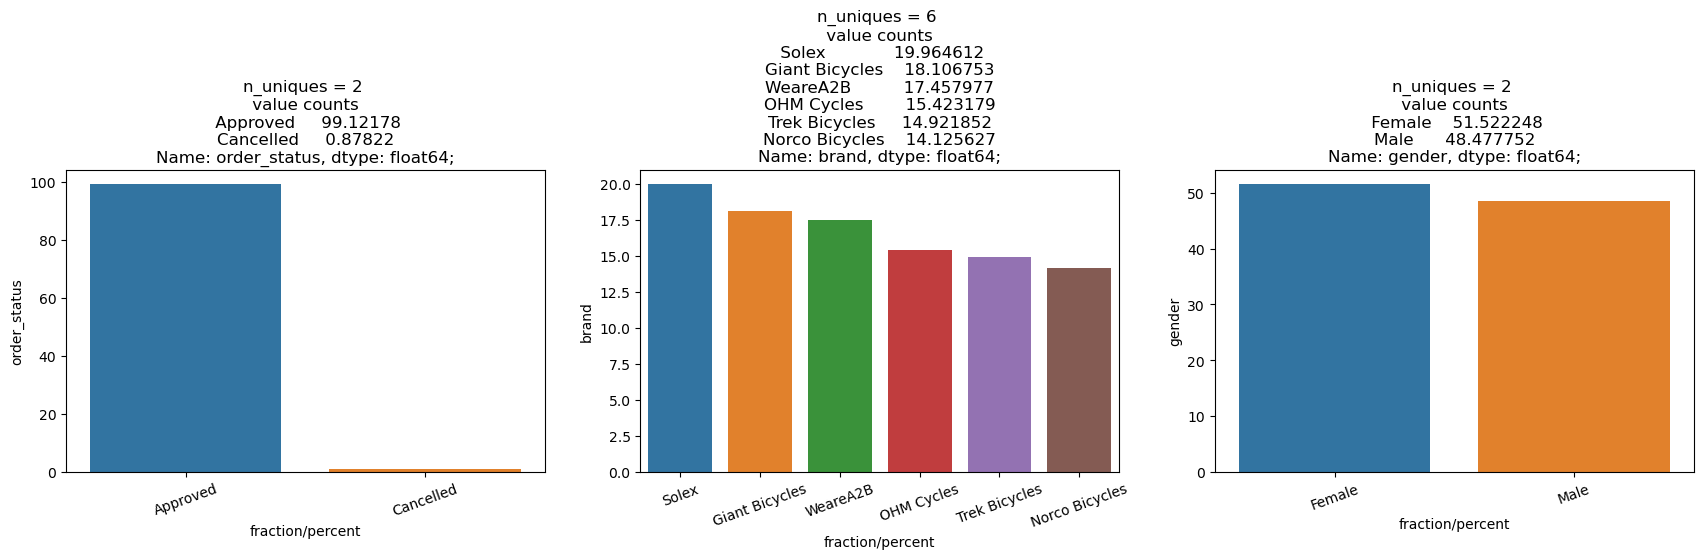

In [1063]:
UVA_category(final, ['order_status','brand','gender'])

- Approved orders accounts about 99% & cancelled is 1% 
- Solex was the most purchased Brand, Narco bicycles were purchased the least. 
- We have more female customers than male 51.5%, 48.5% respectively.. 

#### Columns: Product line, Product Class, Product size. 

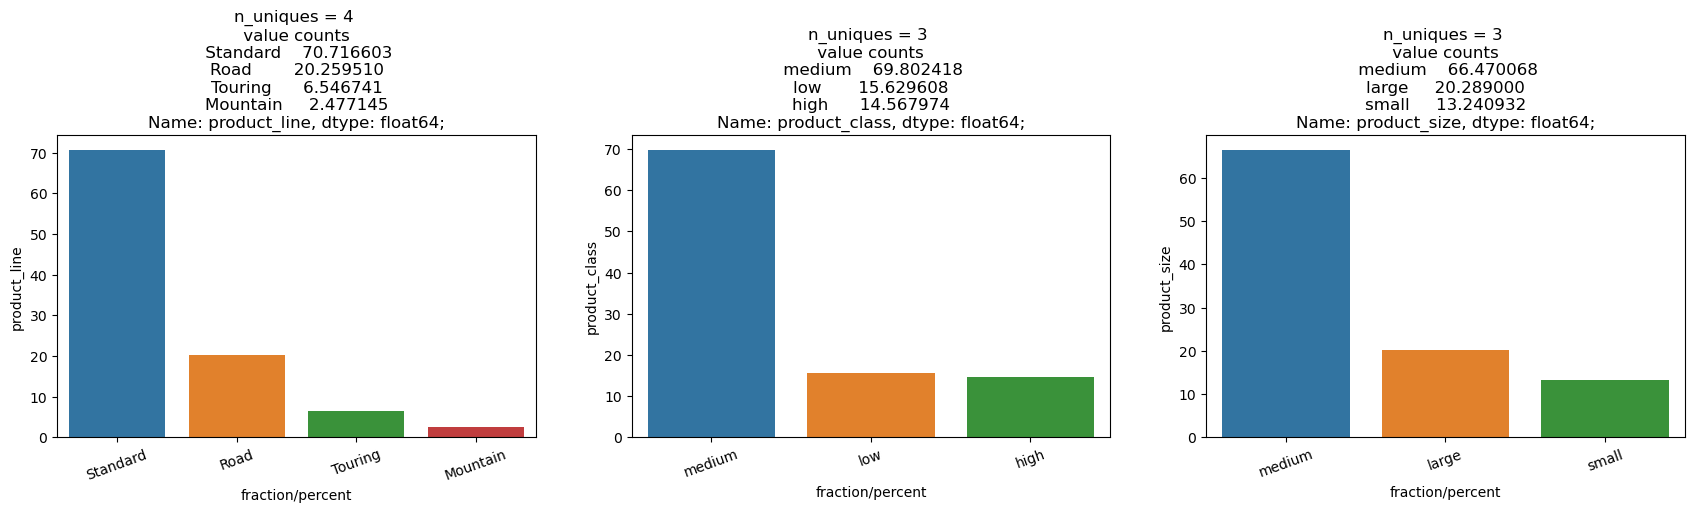

In [1064]:
UVA_category(final,['product_line','product_class','product_size'])

- Product line belonging to standard were most purchased (70.7%), Mountain productline was least purchased. 
- Medium products class were purchased the most, almost 4 times that of high class and low class. 
- Medium size products is being bought the most, again almost 3 times that of large sized. The least is small size products. 

#### Columns:  Job industry category, Wealth Segment: 

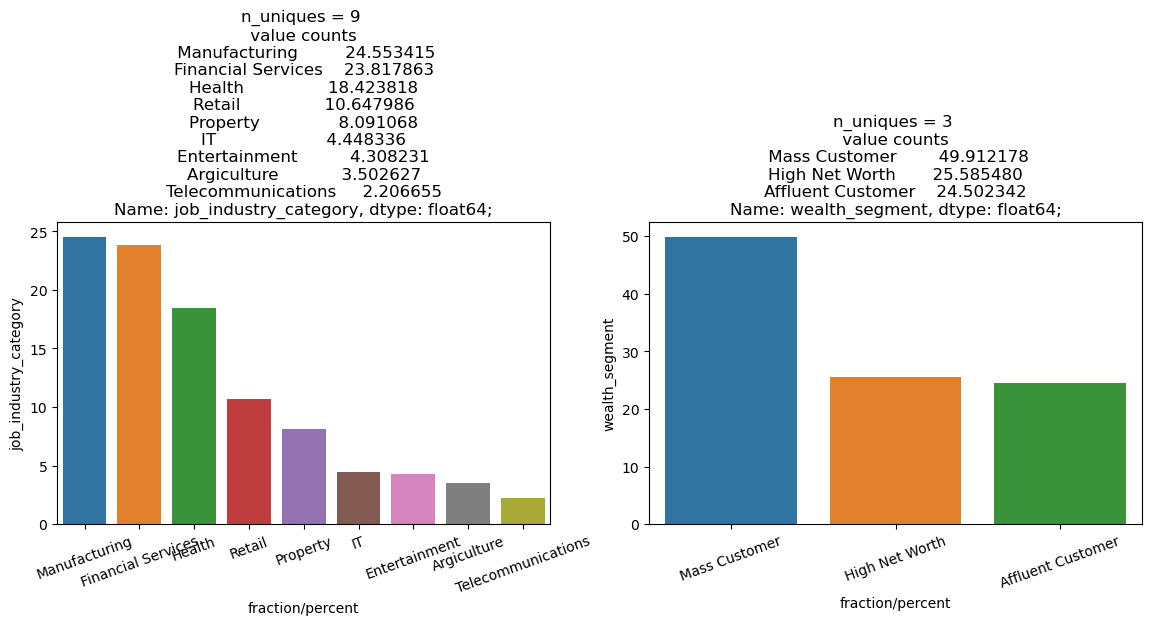

In [1065]:
UVA_category(final, ['job_industry_category','wealth_segment'])

- Customers belonging to Manufacturing industry and Financial services are higher in numbers, customers belonging to Agriculture and Telecommunication are the lowest. 
- Based on wealth segment, Mass customers accounts half of the purchases and high net worth, affluent customers has 25% accounted of the purchase each 

#### Columns:- Deceased indicator, Owns car: 

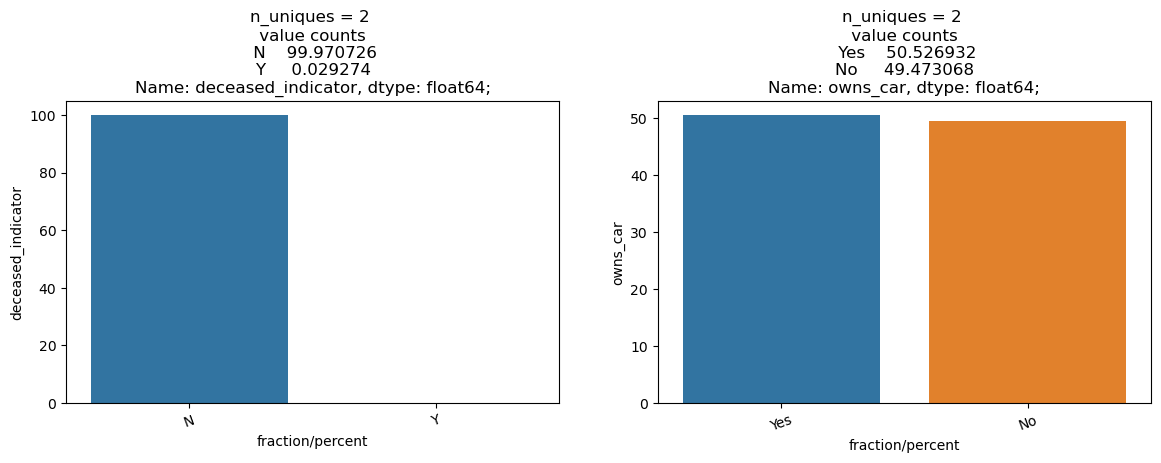

In [1066]:
UVA_category(final, ['deceased_indicator', 'owns_car'])

- 99.9% customers are alive. 
- Half of the customers own a car. 

#### Columns: State

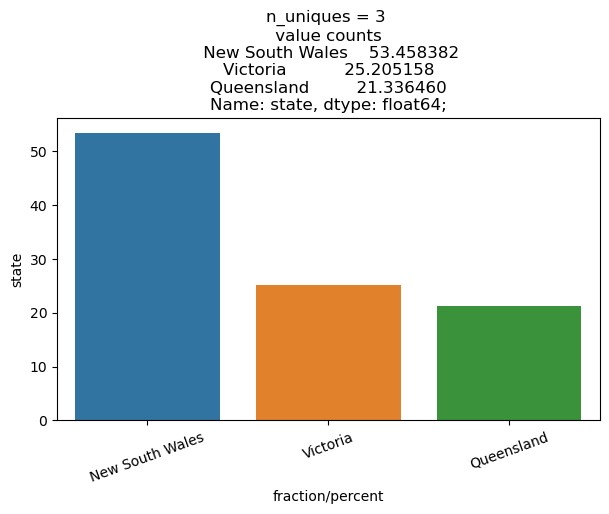

In [1067]:
UVA_category(final,['state'])

- About 53% customers are from New South Wales. Customers from Queensland were the least compared to the other two states. 

#### Columns: Age, Customer title:

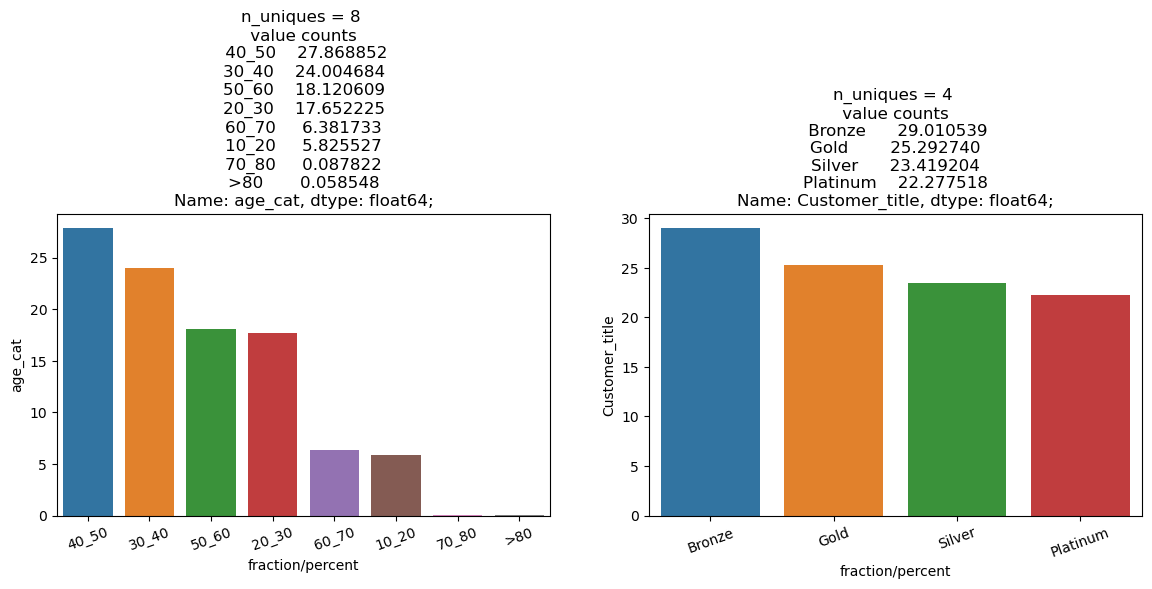

In [1070]:
UVA_category(final, ['age_cat', 'Customer_title'])

- Majority of the customers are aged between 30 and 50.
- Bronze customers are the highest, platinum be the lowest number of customers. 

#### Postcode

In [1094]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (13*size,4), dpi = 60)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True).nlargest(15)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 20)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

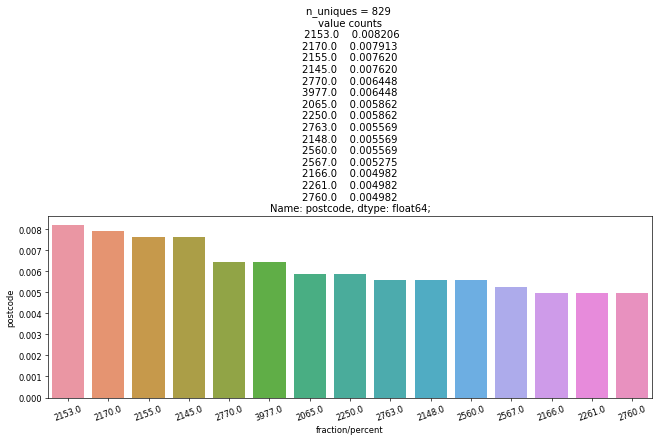

In [1095]:
UVA_category(final, ['postcode'])

customers from 2153, 2170, 2145, 2155 are higher. 



#### Customer value

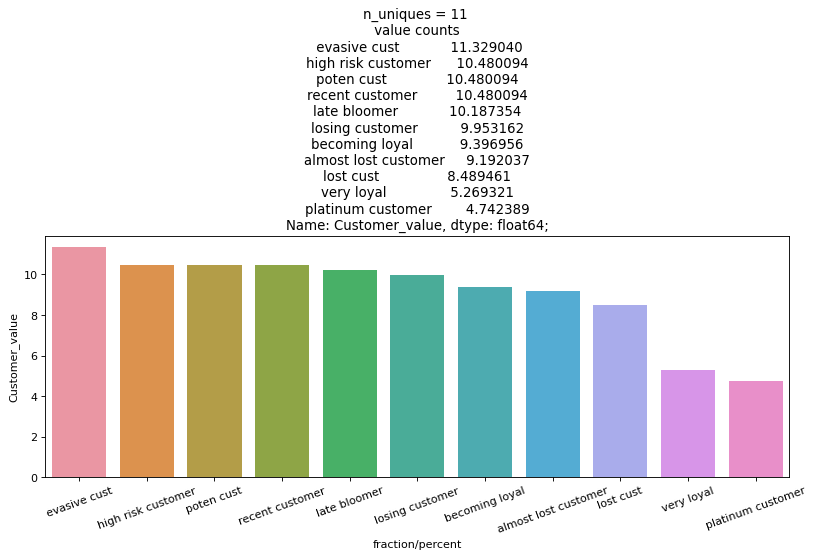

In [1073]:
UVA_category(final, ['Customer_value'])

- We can see that from We have a high number of evasive customers and high risk customers that needs to be noticed. 
- Platimun and loyal customers are least. 

In [1105]:
job_title_temp = final[final['job_title'] != 'Missing']
job_title_temp.job_title.value_counts() 

Business Systems Development Analyst    38
Tax Accountant                          36
Social Worker                           36
Internal Auditor                        35
Legal Assistant                         35
                                        ..
Health Coach III                         2
Research Assistant III                   2
Geologist II                             2
Health Coach I                           2
Developer I                              1
Name: job_title, Length: 195, dtype: int64

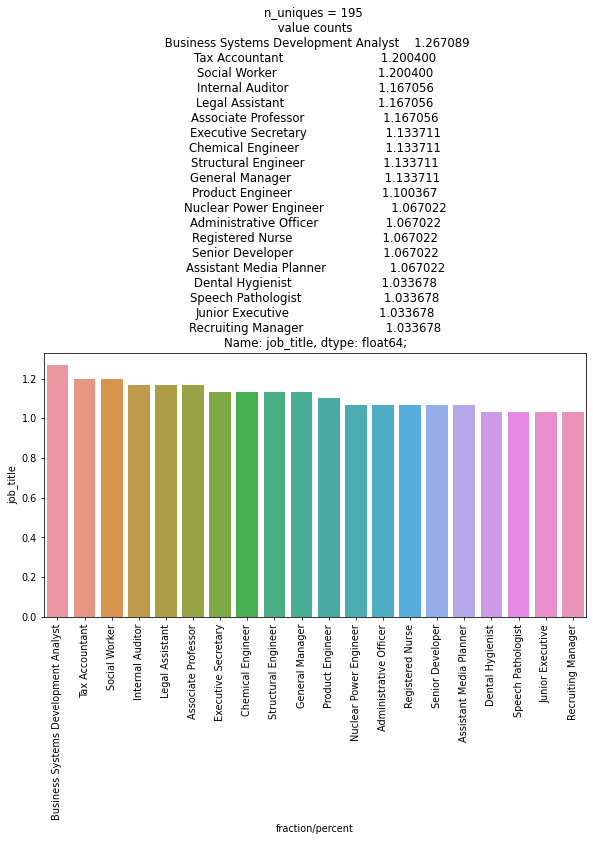

In [1108]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 70)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True).nlargest(20) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

UVA_category(job_title_temp,['job_title'])

##### Function modified to see the lowest.

- Customers who are Business Systems Development Analyst, Tax accountant, social workers are the top 3 based on the number of customers, they comprise about 1.26%, 1.20%, 1.20% of the data. 

In [1109]:
def UVA_category_last(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,5), dpi = 70)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True).nsmallest(20) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))


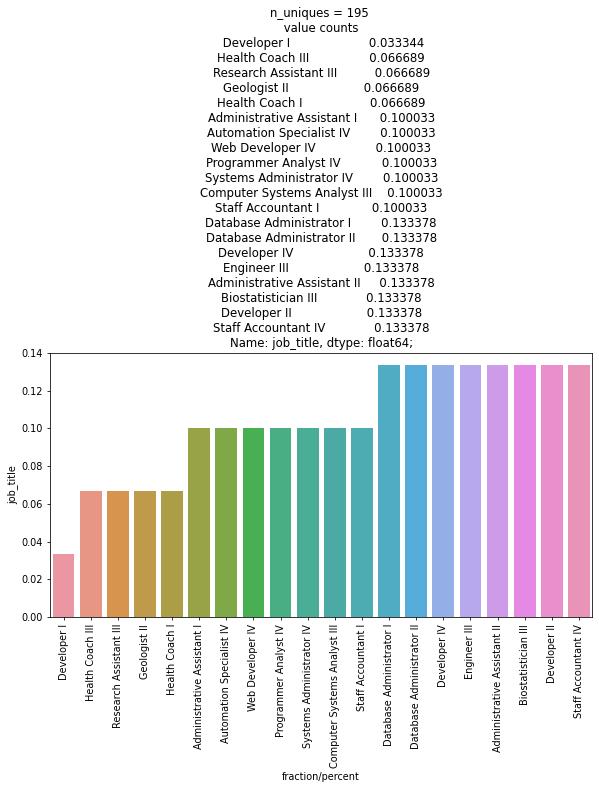

In [1110]:
UVA_category_last(job_title_temp,['job_title'])

- Developer I, health coach III and Research assistant III are the bottom 3 based on the number of customers. 0.04%, 0.05%, 0.06% respective. 

## Univariate Analaysis: Numerical

In [1099]:
num = final.select_dtypes(include = ['int64','int32','float64'])
num.dtypes

online_order                           float64
list_price                             float64
standard_cost                          float64
profit                                 float64
past_3_years_bike_related_purchases    float64
tenure                                 float64
postcode                               float64
property_valuation                     float64
age                                    float64
recency                                  int32
count_product                            int64
min_recency                              int32
sum_profit                             float64
recency_score                            int64
F_score                                  int64
M_score                                  int64
RFM                                      int64
dtype: object

In [1100]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    std = data[i].std()
     

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; std = {}; range = {}\nmean = {}; median = {})'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2), round(std),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

#### Columns: List Price, Standard Cost, Profit: 

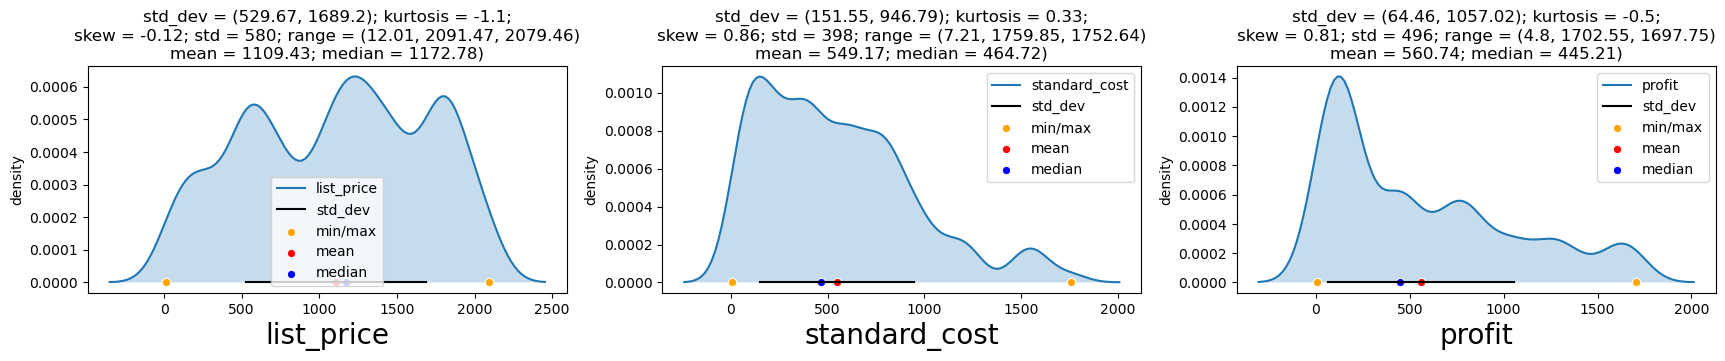

In [1101]:
UVA_numeric(final, ['list_price','standard_cost','profit'])

- List price: 
    - Median is greater than mean which denoted there is some left skewedness, we can see that from the negative value. 
    - Range is from 12 to maximum value of 2091 AUSD. 
    - There are peaks in the distribution which denotes outliers in the data. 
    - Most list prices range from 525 to 1690 AUSD.  
    - Std is lesser than the mean, which tells its Clustered around the mean. 
    
- Standard_cost: 
    - Median is lesser than the mean which shows some positive/right skewedness. Positive skew value. 
    - The values range from 7 - max 1759 AUSD
    - there are peaks in the distribution which denotes outliers in the data. 
    - Most of the cost ranges from 150 to 962 AUSD
    - Std deviation is lesser than the mean, which shows that the values are somewhat clustered around the mean.
    - Standard cost is biased towards lower standard cost. 
    
- Profit: 
    - Mean is greater than the median which tells its right skewed. 
    - Values ranges from 4.8 to 1702 AUSD. Most of the profits range from 58 to 1045 AUSD
    - There are several peaks in the dist. 
    - std dev is less than the mean which tells its clustered around the mean. 
    - Generally there is not much profit.Its biased towards lesser profit. 


#### Number of bike related Purchases last three years, Tenure, Property Valuation: 

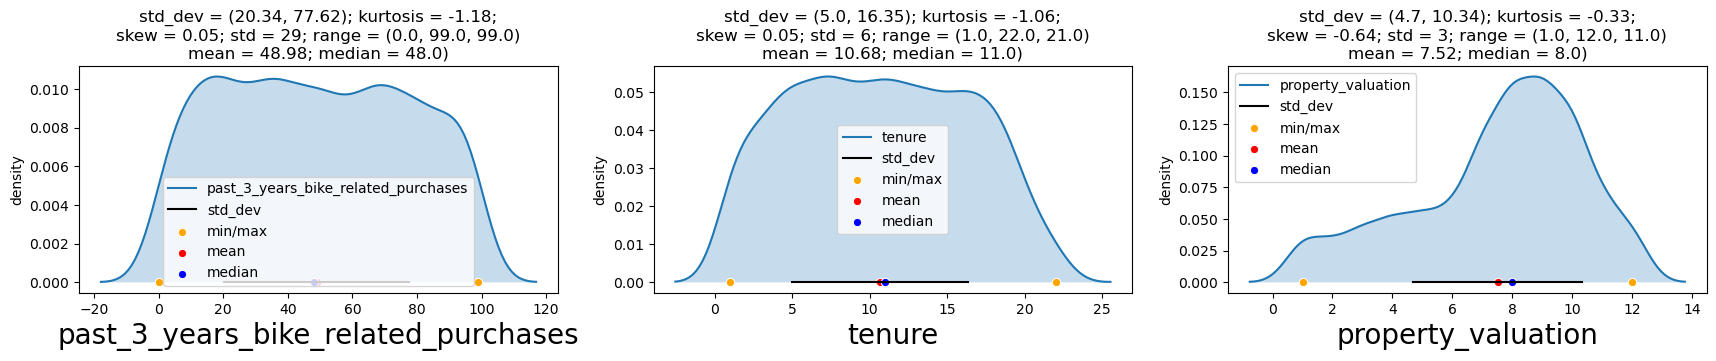

In [1102]:
UVA_numeric(final, ['past_3_years_bike_related_purchases','tenure','property_valuation'])

- Past_3_years_bike_related_purchases: 
    - Median is amlost same as the mean. The distribution is symmetric. There is no skewedness its close to zero. 
    - Range is from 0 to maximum value of 99. 
    - There are slight peaks in the distribution which denotes little outliers in the data. 
    - Number of bike related purchases past 3 years mostly ranges from 20 to 77 times.  
    - Median is close to the mean, hence its some what symmetrical. 
    - Std is lesser than the mean, which tells its Clustered around the mean. 
    - Kurtosis value is negative, its not normally distribution. 
    
    
- tenure: 
    - There is not skewedness in the data, although there is a negative kurtosis. Itsnot normal distribution. Outlliers present.
    - The values range from 1 year - 22 years. 
    - there are  lsight peaks in the distribution which little extreme values in the data. 
    - The tenure mostly varies between 5 years and 16 years. 
    - Median is close to the mean, hence its symmetrical. 
    - Std deviation is slightly lesser than the mean, which shows that the values are somewhat clustered around the mean.
    
    
- property_valuation: 
    - Median is lesser than the median which tells its left skewed. 
    - Values ranges from 4.8 to 1702. Most of the profits range from 58 to 1045
    - There are several peaks in the dist. 
    - std dev is less than the mean which tells its clustered around the mean. 
    - property valuation is biased towards higher values. 


#### COlumn: Age

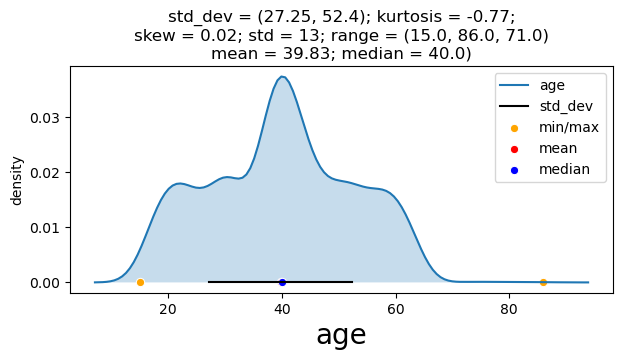

In [1103]:
UVA_numeric(final,['age'])

- Majority of the customers are  27 to 52 years old, mean of age is 40years. 
- There is a negative Kurtosis value which indicated outliers. 
- std is lesser than mean, most data is clustered around the mean. 
- Mean is same as median which shows its symmetrical. 


## Bivariate Analysis: Categories. 

### Initial Bivariate Analysis -- Cont- Cat:

Target Variable is Profit.

In [1114]:
final.dtypes
cat = final.select_dtypes(exclude = ['int32','int64','float64', 'datetime64[ns]'])
cat.dtypes

customer_id              object
transaction_id           object
product_id               object
order_status             object
brand                    object
product_line             object
product_class            object
product_size             object
first_name               object
last_name                object
gender                   object
job_title                object
job_industry_category    object
wealth_segment           object
deceased_indicator       object
owns_car                 object
address                  object
state                    object
country                  object
Month                    object
age_cat                  object
Customer_title           object
Customer_value           object
dtype: object

#### Product line vs sum of profit:

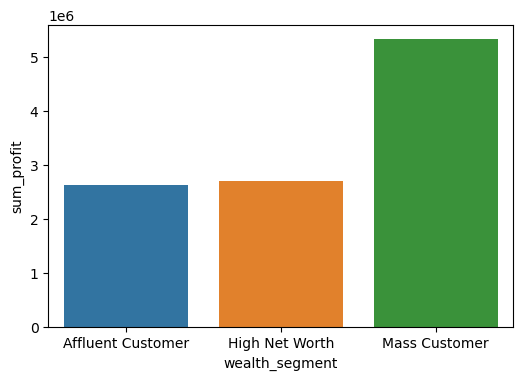

In [1127]:
product_line = pd.DataFrame(final.groupby('wealth_segment')['sum_profit'].sum())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'sum_profit')

plt.figure(figsize=(6,4), dpi = 100)
sns.barplot(x='wealth_segment',y = 'sum_profit', data = product_line, );

- Mass customers generate more profits.  

#### Product line vs Average of profit:

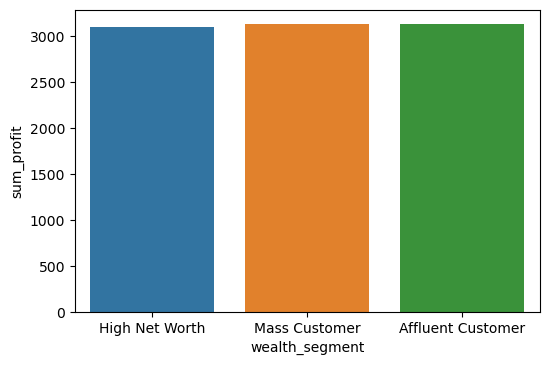

In [1128]:
product_line = pd.DataFrame(final.groupby('wealth_segment')['sum_profit'].mean())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'sum_profit')

plt.figure(figsize=(6,4), dpi = 100)
sns.barplot(x='wealth_segment',y = 'sum_profit', data = product_line, );

In [ ]:
Average profits by affl

#### Product line vs avg profit.

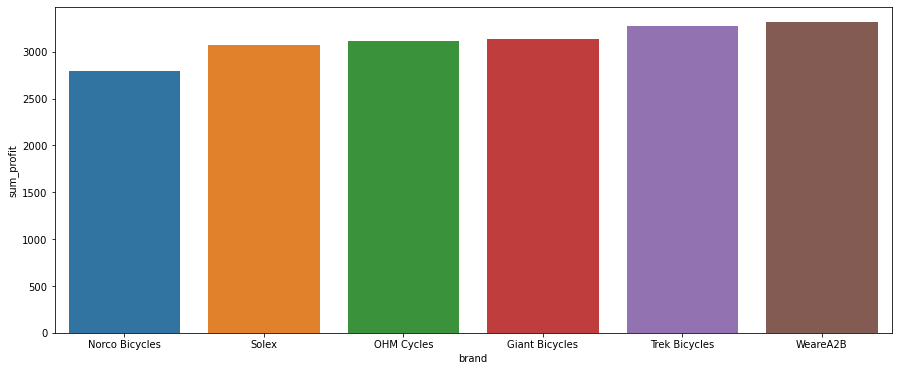

In [1123]:
product_line = pd.DataFrame(final.groupby('brand')['sum_profit'].mean())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'sum_profit')

plt.figure(figsize=(15,6))
sns.barplot(x='brand',y = 'sum_profit', data = product_line, );

- WeareA2B bring high profit margins, norco bicycles bring the least. 

#### Product line vs profit. 

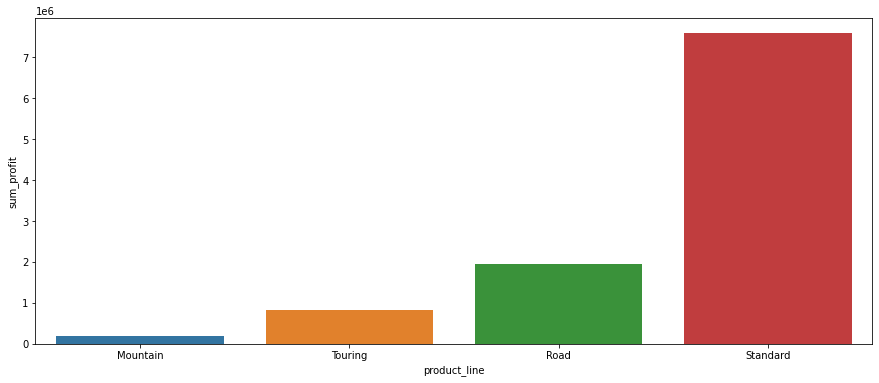

In [1126]:
product_line = pd.DataFrame(final.groupby('product_line')['sum_profit'].sum())
product_line.reset_index(inplace = True) 
product_line.sort_values(inplace = True, by = 'sum_profit')

plt.figure(figsize=(15,6))
sns.barplot(x='product_line',y = 'sum_profit', data = product_line, );

In [970]:
product_line

,product_line,profit
0,Mountain,40055.85
3,Touring,1300603.11
1,Road,1363863.15
2,Standard,7955071.15


- Standard products is the highest profitable. 
- Mountain product line is the least. 

#### job_industry vs profit


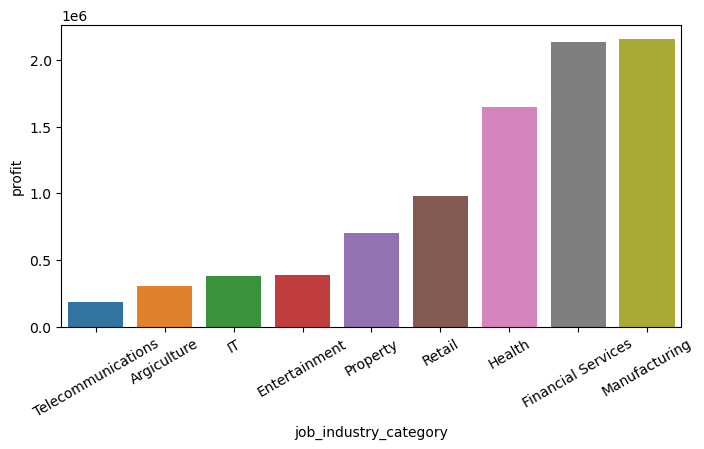

In [971]:
job_industry = pd.DataFrame(data.groupby('job_industry_category')['profit'].sum())
job_industry.reset_index(inplace = True) 
job_industry.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(8,4), dpi = 100)
sns.barplot(x='job_industry_category',y = 'profit', data = job_industry, )
plt.xticks(rotation = 30);

financial services, Retail, Entertainment bring more profit. Although every other industries are almost same. 

- customers working in Manufacturing and financial service industry generate more profit. 
- customers working in Telecommunication is least profitable

#### Job title vs profit


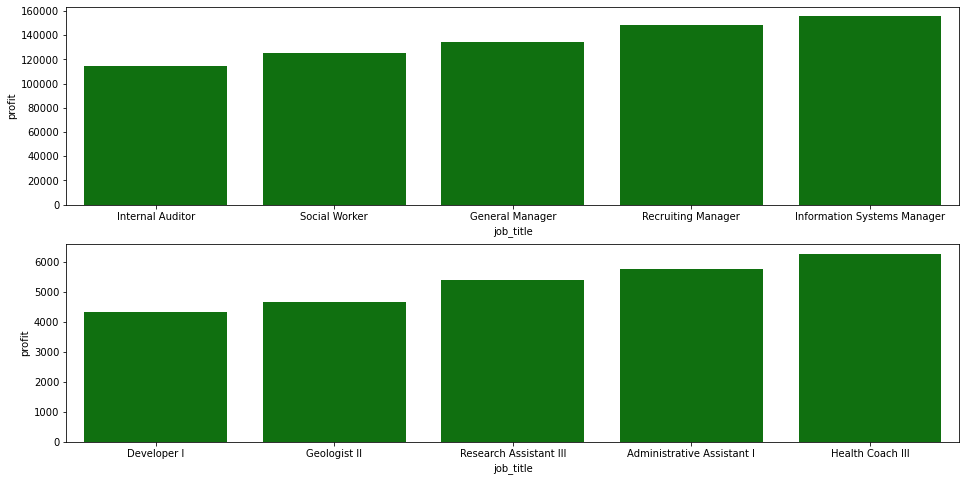

<Figure size 600x400 with 0 Axes>

In [972]:
title = pd.DataFrame(data.groupby('job_title')['profit'].sum())
title.reset_index(inplace = True) 
title.sort_values(inplace = True, by = 'profit')
title = title[title.job_title!='Missing']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
plt.figure(figsize=(6,4), dpi = 100);
sns.barplot(x='job_title',y = 'profit', data = title.tail(5),color = 'green', ax = ax[0]);
sns.barplot(x='job_title',y = 'profit', data = title.head(5),color = 'green', ax = ax[1]);

- Most profits are generated from customers who work as information system manager, recruiting manager, General Manager
- Least profits are generated from people who work as Dev 1, geologist 2. 

#### Profits vs Owning a car

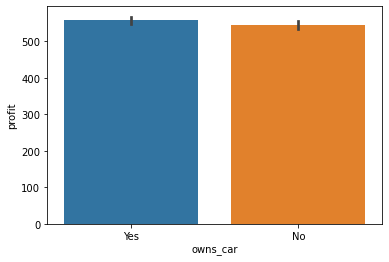

In [973]:
sns.barplot(x='owns_car',y='profit',data = data)

They're almost same. No siginicant evidence owning a car means these customers are profitable. 

#### Postcode vs profit. 

In [974]:
post = pd.DataFrame(data.groupby('postcode')['profit'].sum())
post.reset_index(inplace = True) 
post['postcode'] = post['postcode'].astype('int64')
post['postcode'] = post['postcode'].astype('object')
post.sort_values(inplace = True, by = 'profit')
post

,postcode,profit
418,3060,41.13
580,3616,41.13
136,2191,119.73
279,2535,204.36
567,3458,327.23
...,...,...
346,2770,70968.61
43,2065,73790.71
340,2763,77423.12
128,2170,79037.80


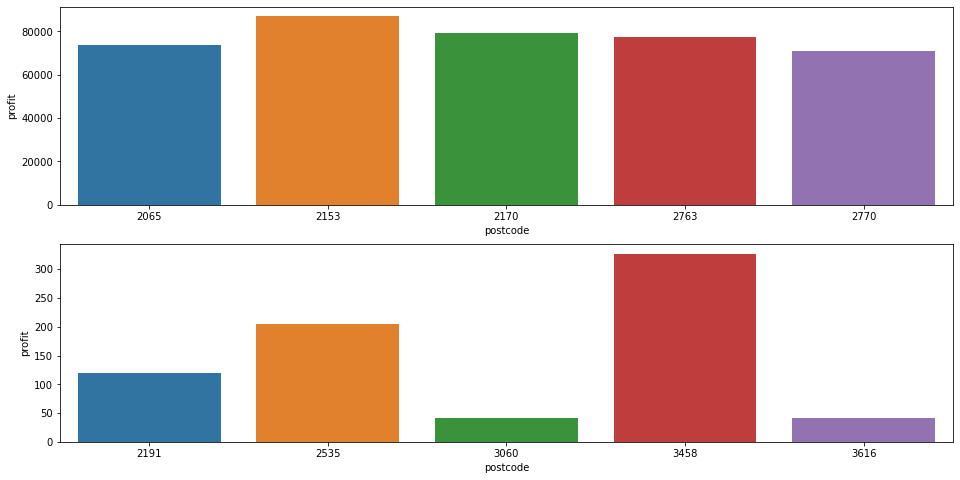

<Figure size 300x200 with 0 Axes>

In [975]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
plt.figure(figsize=(6,4), dpi = 50)
sns.barplot(x='postcode',y = 'profit', data = post.tail(), ax = ax[0]);
sns.barplot(x='postcode',y = 'profit', data = post.head(), ax = ax[1] );

- Customers belonging to 2153 yeild most profit. where as customers from 3060 is least profitable.

#### Age_bin vs profit


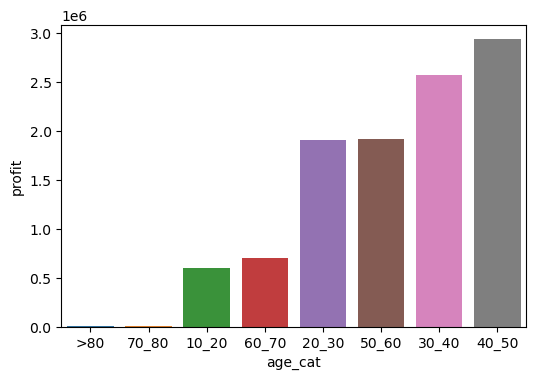

In [976]:
age_bin = pd.DataFrame(data.groupby('age_cat')['profit'].sum())
age_bin.reset_index(inplace = True) 
age_bin.sort_values(inplace = True, by = 'profit')

plt.figure(figsize=(6,4), dpi = 100)
sns.barplot(x='age_cat',y = 'profit', data = age_bin, );

- Customers between 30 - 50 years old produce most profit. 
- customers greater than 80, 10 -20 and 60 -70 are least profitable. 

In [1129]:
final.isnull().sum() 

customer_id                              0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                            53
order_status                             0
brand                                   25
product_line                            25
product_class                           25
product_size                            25
list_price                               0
standard_cost                           25
product_first_sold_date                 25
profit                                  25
first_name                               0
last_name                              109
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                  561
wealth_segment                           0
deceased_indicator                       0
owns_car   

In [1133]:
final['cust_value_target'] = final['Customer_value'].map({'platinum customer':11,'very loyal':10, 'becoming loyal': 9, 'recent customer':8, 'poten cust':7, 'late bloomer':6, 'losing customer': 5, 'high risk customer':4, 'almost lost customer':3 , 'evasive cust':2, 'lost':1 })

In [1137]:
final['cust_value_target'] = final['cust_value_target'].astype(str)

In [1142]:
final['cust_value_target'] = final['cust_value_target'].astype('float')

In [1776]:
final.head() 

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,count_product,min_recency,sum_profit,recency_score,F_score,M_score,RFM,Customer_title,Customer_value,cust_value_target
0,1,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,11,7,3018.09,4,4,3,443,Platinum,very loyal,10.0
11,10,4565,5,2017-08-26,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,6,33,3358.28,3,2,3,323,Gold,poten cust,7.0
17,100,5925,51,2017-05-10,1.0,Approved,OHM Cycles,Standard,high,medium,...,2,11,877.40,4,1,1,411,Gold,recent customer,8.0
19,1000,967,45,2017-06-26,1.0,Approved,Solex,Standard,medium,medium,...,9,0,5383.48,4,4,4,444,Platinum,platinum customer,11.0
28,1001,474,18,2017-10-07,1.0,Approved,Solex,Standard,medium,medium,...,7,42,2884.19,3,3,3,333,Gold,poten cust,7.0


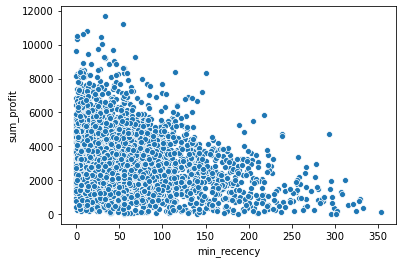

In [1785]:
sns.scatterplot( x = 'min_recency', y = 'sum_profit', data = final )

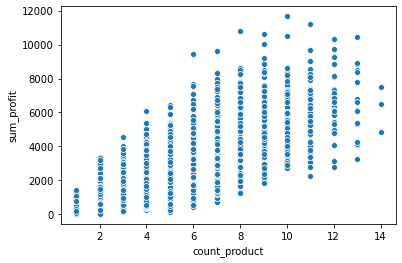

In [1783]:
sns.scatterplot( x = 'count_product', y = 'sum_profit', data = final )

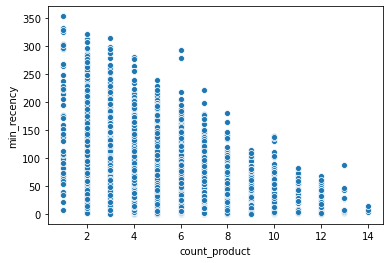

In [1786]:
sns.scatterplot( x = 'count_product', y = 'min_recency', data = final )

In [1130]:
# final.to_csv('crosscheck.csv')

## Lets build a classification model to classify the customers into the customer_value: 

In [1730]:
%matplotlib inline
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


In [1731]:
df = final[['online_order','order_status','brand','product_line','product_class','product_size','list_price','standard_cost','profit','sum_profit','age','gender','past_3_years_bike_related_purchases','job_title','job_industry_category','wealth_segment','deceased_indicator','owns_car','tenure','postcode','state','property_valuation','recency_score','F_score','M_score','RFM','Customer_title','Customer_value','cust_value_target']]

In [1514]:
df

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,sum_profit,...,postcode,state,property_valuation,recency_score,F_score,M_score,RFM,Customer_title,Customer_value,cust_value_target
0,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56,3018.09,...,2016.0,New South Wales,10.0,4,4,3,443,Platinum,very loyal,10.0
11,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,114.93,3358.28,...,NaN,NaN,NaN,3,2,3,323,Gold,poten cust,7.0
17,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,802.26,877.40,...,2065.0,New South Wales,12.0,4,1,1,411,Gold,recent customer,8.0
19,1.0,Approved,Solex,Standard,medium,medium,441.49,84.99,356.50,5383.48,...,3136.0,Victoria,9.0,4,4,4,444,Platinum,platinum customer,11.0
28,1.0,Approved,Solex,Standard,medium,medium,575.27,431.45,143.82,2884.19,...,4869.0,Queensland,3.0,3,3,3,333,Gold,poten cust,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19511,1.0,Approved,Solex,Standard,medium,medium,100.35,75.26,25.09,2069.64,...,3141.0,Victoria,10.0,3,2,2,322,Gold,late bloomer,6.0
19516,1.0,Approved,Solex,Standard,medium,medium,441.49,84.99,356.50,6764.67,...,4034.0,Queensland,5.0,4,3,4,434,Platinum,very loyal,10.0
19523,1.0,Approved,Norco Bicycles,Road,medium,large,1240.31,795.10,445.21,2923.29,...,2146.0,New South Wales,9.0,2,3,3,233,Silver,losing customer,5.0
19530,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,509.97,585.45,...,2768.0,New South Wales,9.0,1,1,1,111,Bronze,lost cust,NaN


In [1515]:
df.isnull().sum().sort_values() 

job_title                                0
M_score                                  0
F_score                                  0
recency_score                            0
tenure                                   0
owns_car                                 0
deceased_indicator                       0
wealth_segment                           0
Customer_value                           0
RFM                                      0
past_3_years_bike_related_purchases      0
Customer_title                           0
age                                      0
sum_profit                               0
list_price                               0
order_status                             0
gender                                   0
postcode                                 4
state                                    4
property_valuation                       4
profit                                  25
standard_cost                           25
product_size                            25
product_cla

In [1516]:
df_wo_null = df.dropna(axis = 0)

In [1517]:
df_wo_null.isnull().sum().sort_values() 

online_order                           0
Customer_title                         0
RFM                                    0
M_score                                0
F_score                                0
recency_score                          0
property_valuation                     0
state                                  0
postcode                               0
tenure                                 0
owns_car                               0
deceased_indicator                     0
wealth_segment                         0
Customer_value                         0
job_industry_category                  0
past_3_years_bike_related_purchases    0
gender                                 0
age                                    0
sum_profit                             0
profit                                 0
standard_cost                          0
list_price                             0
product_size                           0
product_class                          0
product_line    

In [1518]:
df_wo_null = pd.get_dummies(df_wo_null)

In [1519]:
df_wo_null.shape

(2541, 264)

#### Segregating variables: Independent and Dependent Variables

In [1520]:
x = df_wo_null.drop(['cust_value_target'], axis = 1)
y = df_wo_null['cust_value_target']
x.shape, y.shape

((2541, 263), (2541,))

#### Splitting the data into train set and the test set

In [1521]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 56)

#### Normalising using min_max_scaler

In [1396]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [1397]:
cols = train_x.columns 
cols

Index(['online_order', 'list_price', 'standard_cost', 'profit', 'sum_profit',
       'past_3_years_bike_related_purchases', 'tenure', 'postcode',
       'property_valuation', 'recency_score',
       ...
       'Customer_value_almost lost customer', 'Customer_value_becoming loyal',
       'Customer_value_evasive cust', 'Customer_value_high risk customer',
       'Customer_value_late bloomer', 'Customer_value_losing customer',
       'Customer_value_platinum customer', 'Customer_value_poten cust',
       'Customer_value_recent customer', 'Customer_value_very loyal'],
      dtype='object', length=270)

In [1398]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns = cols)
train_x_scaled.head() 

,online_order,list_price,standard_cost,profit,sum_profit,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,recency_score,...,Customer_value_almost lost customer,Customer_value_becoming loyal,Customer_value_evasive cust,Customer_value_high risk customer,Customer_value_late bloomer,Customer_value_losing customer,Customer_value_platinum customer,Customer_value_poten cust,Customer_value_recent customer,Customer_value_very loyal
0,0.0,0.278077,0.295623,0.035417,0.223306,0.242424,0.047619,0.244962,0.000000,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.376699,0.053844,0.405808,0.227618,0.171717,0.857143,0.057679,0.727273,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.234445,0.217677,0.062441,0.225694,0.545455,0.809524,0.374913,0.454545,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.669159,0.540676,0.261452,0.791627,0.646465,0.095238,0.486449,0.090909,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.250786,0.224188,0.075736,0.181459,0.171717,0.285714,0.202224,0.727273,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1399]:
test_x_scaled = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled,columns = cols)
test_x_scaled.head() 

,online_order,list_price,standard_cost,profit,sum_profit,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,recency_score,...,Customer_value_almost lost customer,Customer_value_becoming loyal,Customer_value_evasive cust,Customer_value_high risk customer,Customer_value_late bloomer,Customer_value_losing customer,Customer_value_platinum customer,Customer_value_poten cust,Customer_value_recent customer,Customer_value_very loyal
0,0.0,0.856674,0.137855,0.906971,0.441231,0.141414,0.523810,0.395478,0.909091,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.356165,0.113058,0.319529,0.099943,0.101010,0.571429,0.008348,0.636364,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.278077,0.295623,0.035417,0.171117,0.666667,0.285714,0.417043,1.000000,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.042482,0.038827,0.011951,0.279350,0.757576,0.714286,0.995478,0.000000,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.864643,0.915014,0.114446,0.449036,0.434343,0.285714,0.020522,0.727273,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Implementing Logistic Regression: 

In [1400]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [1401]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression()

#### Making predictions using predict function

In [1402]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([9., 5., 4., ..., 9., 4., 4.])

In [1403]:
# Calculating f1-score
k = f1_score(train_predict, train_y, average='weighted')
print('Training f1_score', k )

Training f1_score 0.40815084014096564


In [1404]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y, average='weighted')
print('Test f1_score    ', k )

Test f1_score     0.39540158753326043


In [1405]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y, train_predict)

0.384251968503937

In [1406]:
logreg.score(test_x, test_y)

0.37264150943396224

In [1407]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, train_x, train_y, cv = 10)
scores

array([0.40314136, 0.36125654, 0.38743455, 0.34031414, 0.38743455,
       0.35263158, 0.39473684, 0.33684211, 0.36842105, 0.4       ])

In [1408]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.3368421052631579, 0.3732212730779829, 0.4031413612565445)

#### Definining Metric: 

In [1409]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [1575]:
x = df_wo_null.drop(['cust_value_target'], axis = 1)
y = df_wo_null['cust_value_target']
x.shape, y.shape

((2541, 263), (2541,))

In [1576]:
#Splitting the data into Train and Validation set
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.35)

In [1577]:
# distribution in training set
y_train.value_counts(normalize=True)

2.0     0.123885
4.0     0.117060
8.0     0.116535
6.0     0.112336
7.0     0.112336
5.0     0.110761
9.0     0.105512
3.0     0.095013
10.0    0.055643
11.0    0.050919
Name: cust_value_target, dtype: float64

In [1578]:
# distribution in validation set
y_valid.value_counts(normalize=True)

2.0     0.124214
8.0     0.116352
4.0     0.116352
7.0     0.113208
6.0     0.111635
5.0     0.110063
9.0     0.105346
3.0     0.094340
10.0    0.056604
11.0    0.051887
Name: cust_value_target, dtype: float64

In [1579]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [1580]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [1583]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(random_state=10)

In [1584]:
#checking the training score
dt_model.score(train_x, train_y)

1.0

In [1585]:
#checking the validation score
dt_model.score(test_x, test_y)

1.0

In [1586]:
#predictions on validation set
dt_model.predict(test_x)

array([ 4.,  2.,  5.,  4.,  2.,  7.,  5.,  7.,  5.,  3.,  2., 10.,  3.,
        4.,  5., 10.,  7.,  4.,  2.,  8.,  3.,  5.,  6.,  8.,  5., 10.,
        8.,  4.,  2.,  2.,  7.,  2., 10.,  5.,  8.,  5.,  8.,  6.,  9.,
        3.,  5.,  2., 10., 10.,  4., 10.,  2.,  2.,  7.,  3.,  5.,  2.,
        6.,  8.,  5.,  3.,  6.,  7., 10.,  8.,  9.,  3.,  3.,  7.,  7.,
        6.,  5.,  4.,  8.,  7.,  3.,  4.,  9.,  5.,  9., 10., 11., 11.,
        3.,  3.,  5.,  3.,  4.,  7.,  3.,  3.,  4., 11.,  4.,  5.,  6.,
        5.,  8.,  5.,  4.,  8.,  7.,  2.,  5.,  3.,  9.,  4.,  8.,  2.,
        9.,  2.,  2.,  4.,  6.,  7.,  6.,  3.,  6.,  2.,  5.,  9.,  6.,
        9.,  9.,  4.,  8.,  6., 11.,  8.,  6.,  9.,  8.,  8., 11.,  4.,
        2.,  3.,  6.,  2.,  9.,  6.,  4.,  6.,  8., 11.,  3.,  8.,  5.,
       11.,  9.,  8.,  3.,  2.,  5.,  7., 11.,  9.,  2.,  8.,  6.,  8.,
        9.,  4.,  8.,  7.,  2.,  9.,  6.,  8.,  2.,  3.,  7.,  7.,  3.,
        8.,  7.,  5.,  8.,  9.,  8.,  9.,  3., 11., 10.,  6.,  7

In [1587]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    validation_accuracy.append(dt_model.score(test_x, test_y))

In [1588]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head(50)

,max_depth,train_acc,valid_acc
0,1,0.241066,0.240449
1,2,0.357359,0.357303
2,3,0.470018,0.469663
3,4,0.582071,0.582022
4,5,0.692913,0.692135
5,6,0.798304,0.797753
6,7,0.893398,0.892135
7,8,0.949122,0.948315
8,9,1.000000,1.000000
9,10,1.000000,1.000000


No handles with labels found to put in legend.


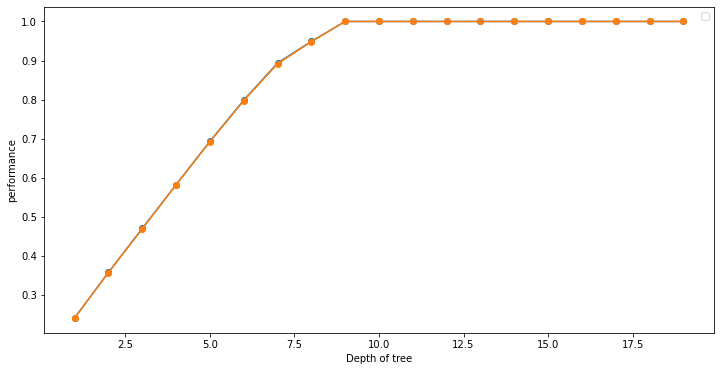

In [1421]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [1602]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [1603]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [1604]:
#Training score
dt_model.score(train_x, train_y)

0.949121744397335

In [1605]:
#Validation score
dt_model.score(train_x, train_y)

0.949121744397335

### KNN

In [1606]:
x = df_wo_null.drop(['cust_value_target'], axis = 1)
y = df_wo_null['cust_value_target']
x.shape, y.shape

((2541, 263), (2541,))

In [1607]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [1608]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [1609]:
x.head() 

,online_order,list_price,standard_cost,profit,sum_profit,age,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,...,Customer_value_almost lost customer,Customer_value_becoming loyal,Customer_value_evasive cust,Customer_value_high risk customer,Customer_value_late bloomer,Customer_value_losing customer,Customer_value_platinum customer,Customer_value_poten cust,Customer_value_recent customer,Customer_value_very loyal
0,0.0,0.107538,0.067247,0.062294,0.256365,0.690141,0.939394,0.476190,0.005550,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.958734,0.682508,0.469716,0.072350,0.478873,0.808081,0.142857,0.022546,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.206534,0.044379,0.207157,0.459696,0.338028,0.444444,0.476190,0.394034,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.270868,0.242058,0.081885,0.244855,0.323944,0.636364,0.619048,0.995144,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.548195,0.366464,0.293135,0.452553,0.478873,0.353535,0.809524,0.720777,0.545455,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1610]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.35, random_state = 56, stratify=y)

In [1611]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [1612]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y, average = 'weighted')
print('Test F1 Score    ', k )

Test F1 Score     0.9699113682845599


### elbow for classifier

In [1613]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y, average = 'weighted')
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [1614]:
#Defining K range
k = range(6, 70, 10)

In [1615]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

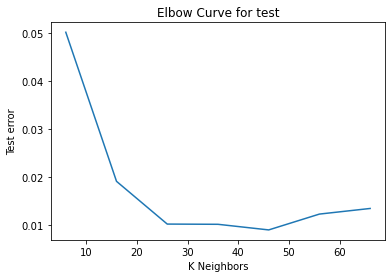

In [1616]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [1660]:
# Creating instance of KNN
clf = KNN(n_neighbors = 46)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k1 = f1_score(train_predict, train_y, average = 'macro')
print('Training F1 Score', k1 )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y, average = 'macro')
print('Test F1 Score    ', k )

Training F1 Score 0.9928569469996805
Test F1 Score     0.9897374034964429


Average = 'weighted'; it calculates the metrics for each label and find their weighted mean by the number of true instances

average = 'Macro'. the advantage of using the Macro F1 Score is that it gives equal weight to all data points, If F1 macro has a large value, this indicates that a classifier performs well for each individual class. The macro-average is therefore more suitable for data with an imbalanced class distribution.

In [1643]:
accuracy_score(test_predict, test_y)

0.9910112359550561

In [1661]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp,train_y, average = 'macro')
        train_f1.append(tmp)
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y, average = 'macro')
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [1662]:
#Defining K range
k = range(1,150)

In [1663]:
# calling above defined function
train_f1, test_f1 = F1score(k)
score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)
score

,train score,test score
1,1.000000,0.835960
2,0.921055,0.809790
3,0.965580,0.891583
4,0.962011,0.912408
5,0.973202,0.937165
...,...,...
145,0.978198,0.972177
146,0.976406,0.973109
147,0.977323,0.973109
148,0.977323,0.974964


In [1664]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

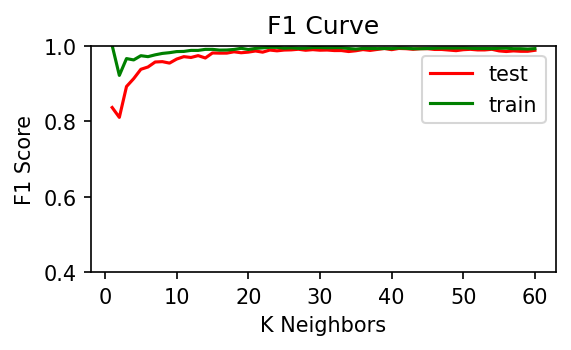

In [1665]:
# plotting the Curvesg
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train_f1[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

# New customer list 

In [1765]:
customer_new.head() 

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.94,1.1750,1.46875,1.248437,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.46,0.4600,0.57500,0.488750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.08,1.0800,1.08000,1.080000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.08750,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.98,0.9800,1.22500,1.225000,4,4,1.703125


In [1769]:
# Adding age column: 
now = datetime.now() 
now
customer_new['age'] = now  - customer_new['DOB']# Age at the time of Purchase
customer_new['age'] = round(customer_new['age']/np.timedelta64(1,'Y'))

In [1772]:
customer_new.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

In [1771]:
def age_cat(col): 
    if col < 10: 
        return '0_10'
    elif (col >=10 and col < 20):
        return '10_20'
    elif (col >=20 and col < 30): 
        return '20_30'
    elif (col >=30 and col <40): 
        return '30_40'
    elif (col >= 40 and col < 50): 
        return '40_50'
    elif (col >=50 and col < 60): 
        return '50_60'
    elif (col >=60 and col < 70): 
        return '60_70'
    elif (col >= 70 and col < 80): 
        return '70_80'
    elif col > 80:
        return '>80'

In [1773]:
customer_new['age_cat'] = customer_new['age'].apply(age_cat)

In [1775]:
customer_new.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_cat
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6,0.94,1.175,1.46875,1.248437,1,1,1.71875,63.0,60_70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11,0.46,0.460,0.57500,0.488750,1,1,1.71875,50.0,50_60


In [1788]:
new_customer = customer_new.to_csv('newcust_tableau.csv')